In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')
sns.set(font_scale=2.5)

import missingno as msno
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
# 1. Data set확인

In [3]:
df_train = pd.read_csv("./practice_kaggle/titanic/train.csv")
df_test = pd.read_csv("./practice_kaggle/titanic/test.csv")

In [4]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [7]:
## 1.1 null data check

In [8]:
for col in df_train.columns:
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (df_train[col].isnull().sum() / df_train[col].shape[0]))
    print(msg)

column: PassengerId	 Percent of NaN value: 0.00%
column:   Survived	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 19.87%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.00%
column:      Cabin	 Percent of NaN value: 77.10%
column:   Embarked	 Percent of NaN value: 0.22%


In [9]:
for col in df_test.columns:
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (df_test[col].isnull().sum() / df_test[col].shape[0]))
    print(msg)

column: PassengerId	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 20.57%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.24%
column:      Cabin	 Percent of NaN value: 78.23%
column:   Embarked	 Percent of NaN value: 0.00%


<AxesSubplot:>

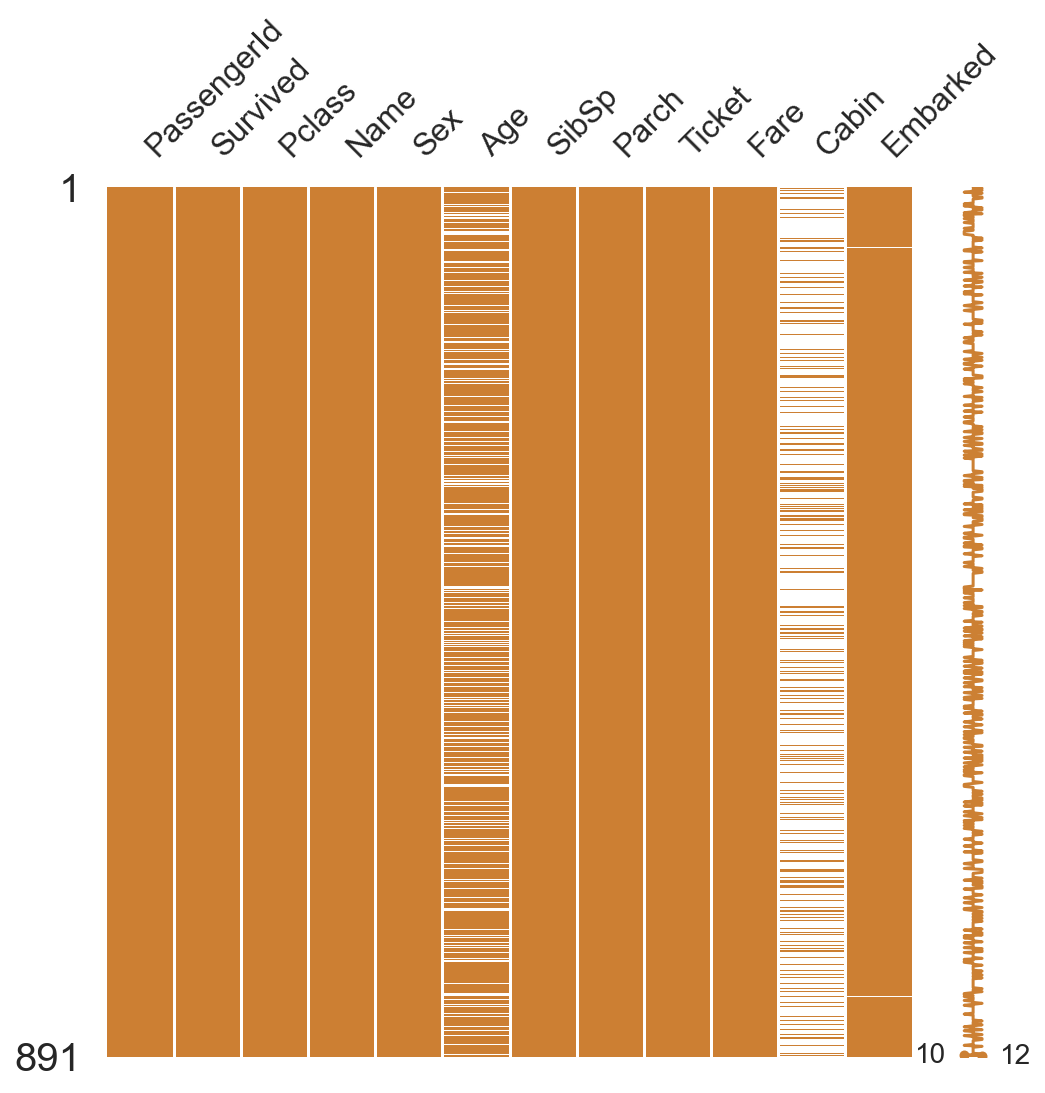

In [10]:
msno.matrix(df=df_train.iloc[:, :], figsize=(8, 8), color=(0.8, 0.5, 0.2))

<AxesSubplot:>

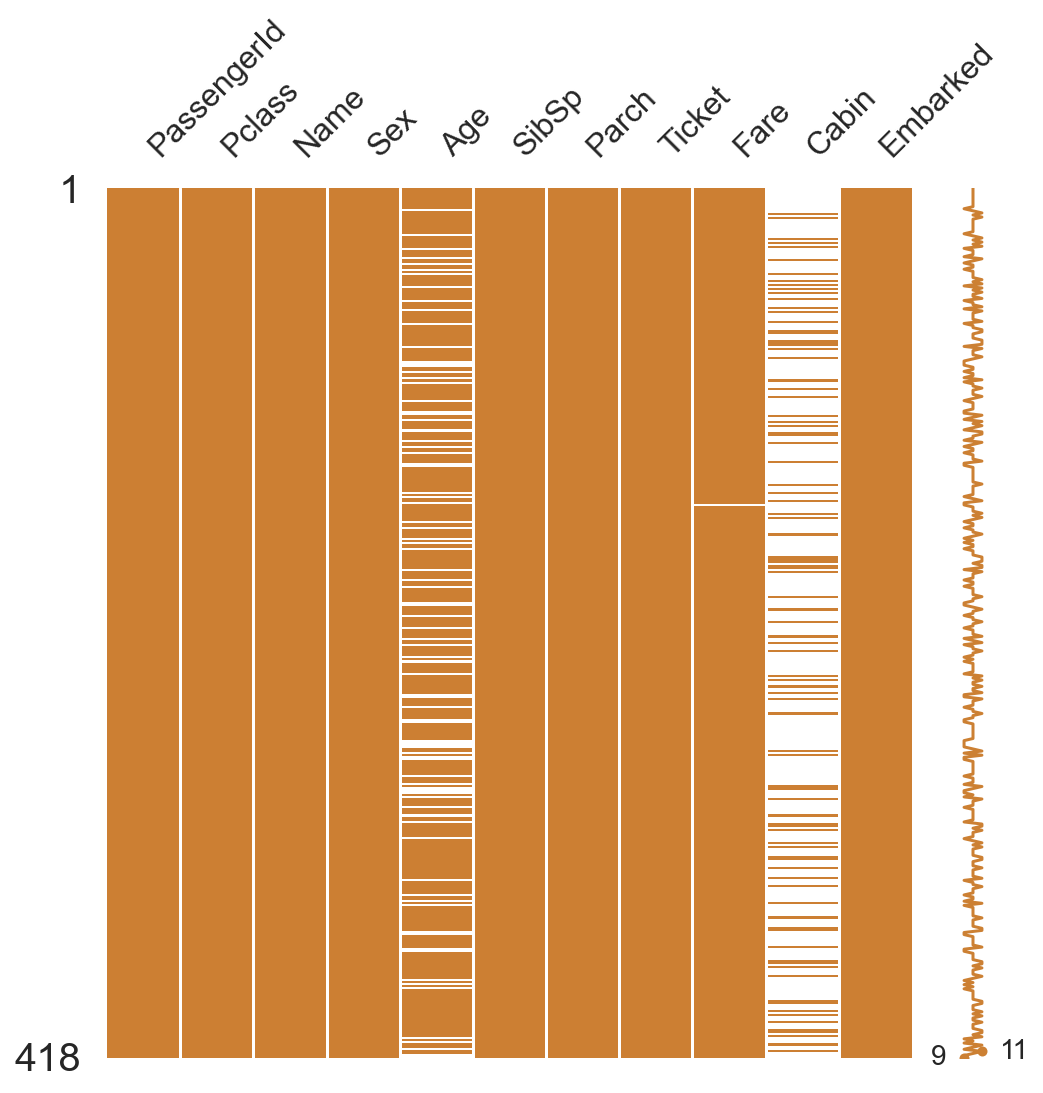

In [11]:
msno.matrix(df=df_test.iloc[:, :], figsize=(8, 8), color=(0.8, 0.5, 0.2))

<AxesSubplot:>

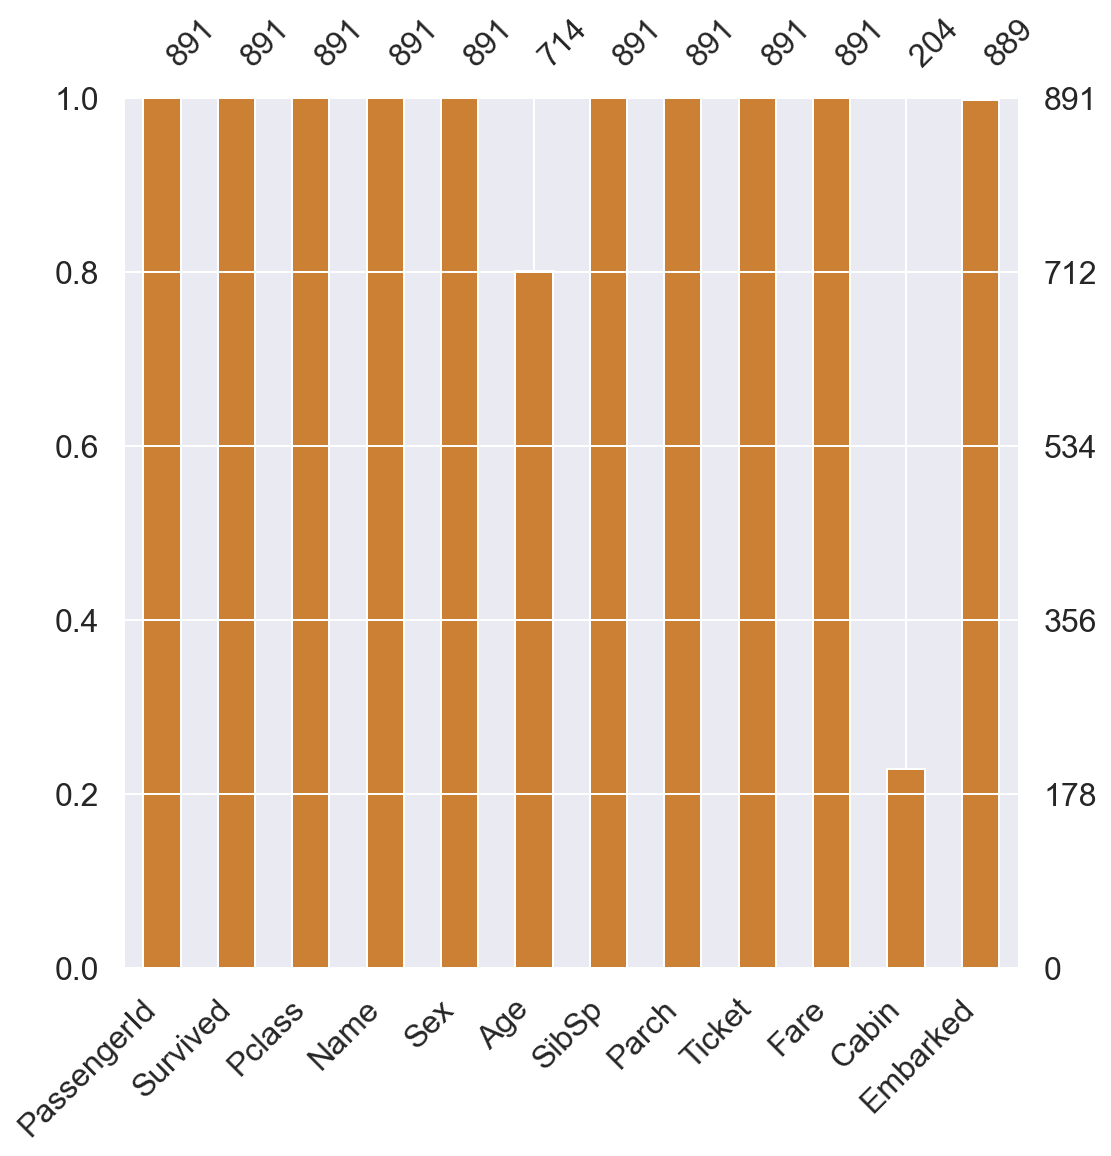

In [12]:
msno.bar(df=df_train.iloc[:, :], figsize=(8, 8), color=(0.8, 0.5, 0.2))

<AxesSubplot:>

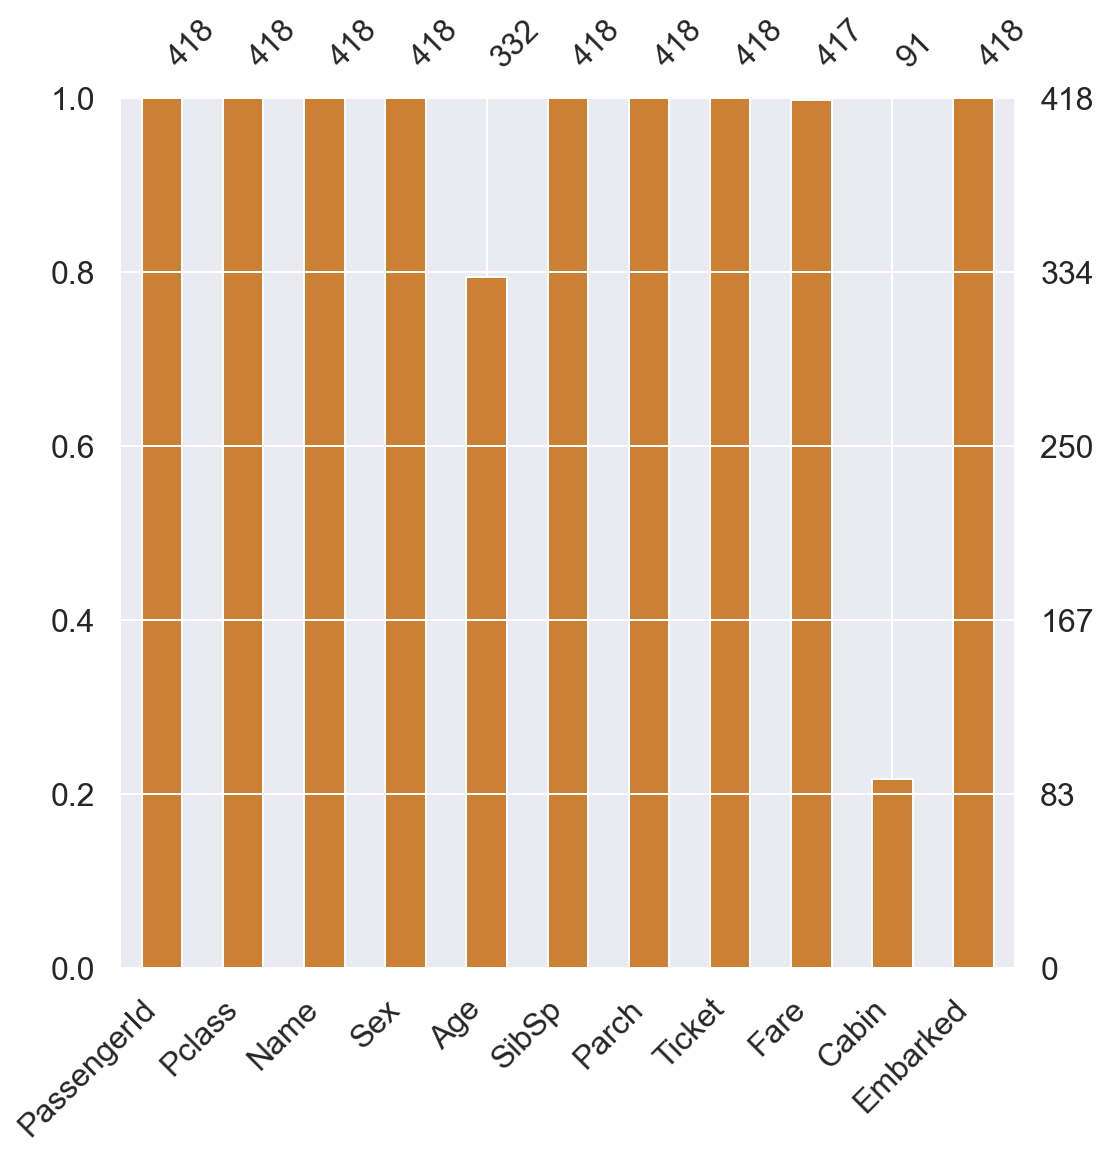

In [13]:
msno.bar(df=df_test.iloc[:, :], figsize=(8, 8), color=(0.8, 0.5, 0.2))

In [14]:
# 1.2 target label 확인

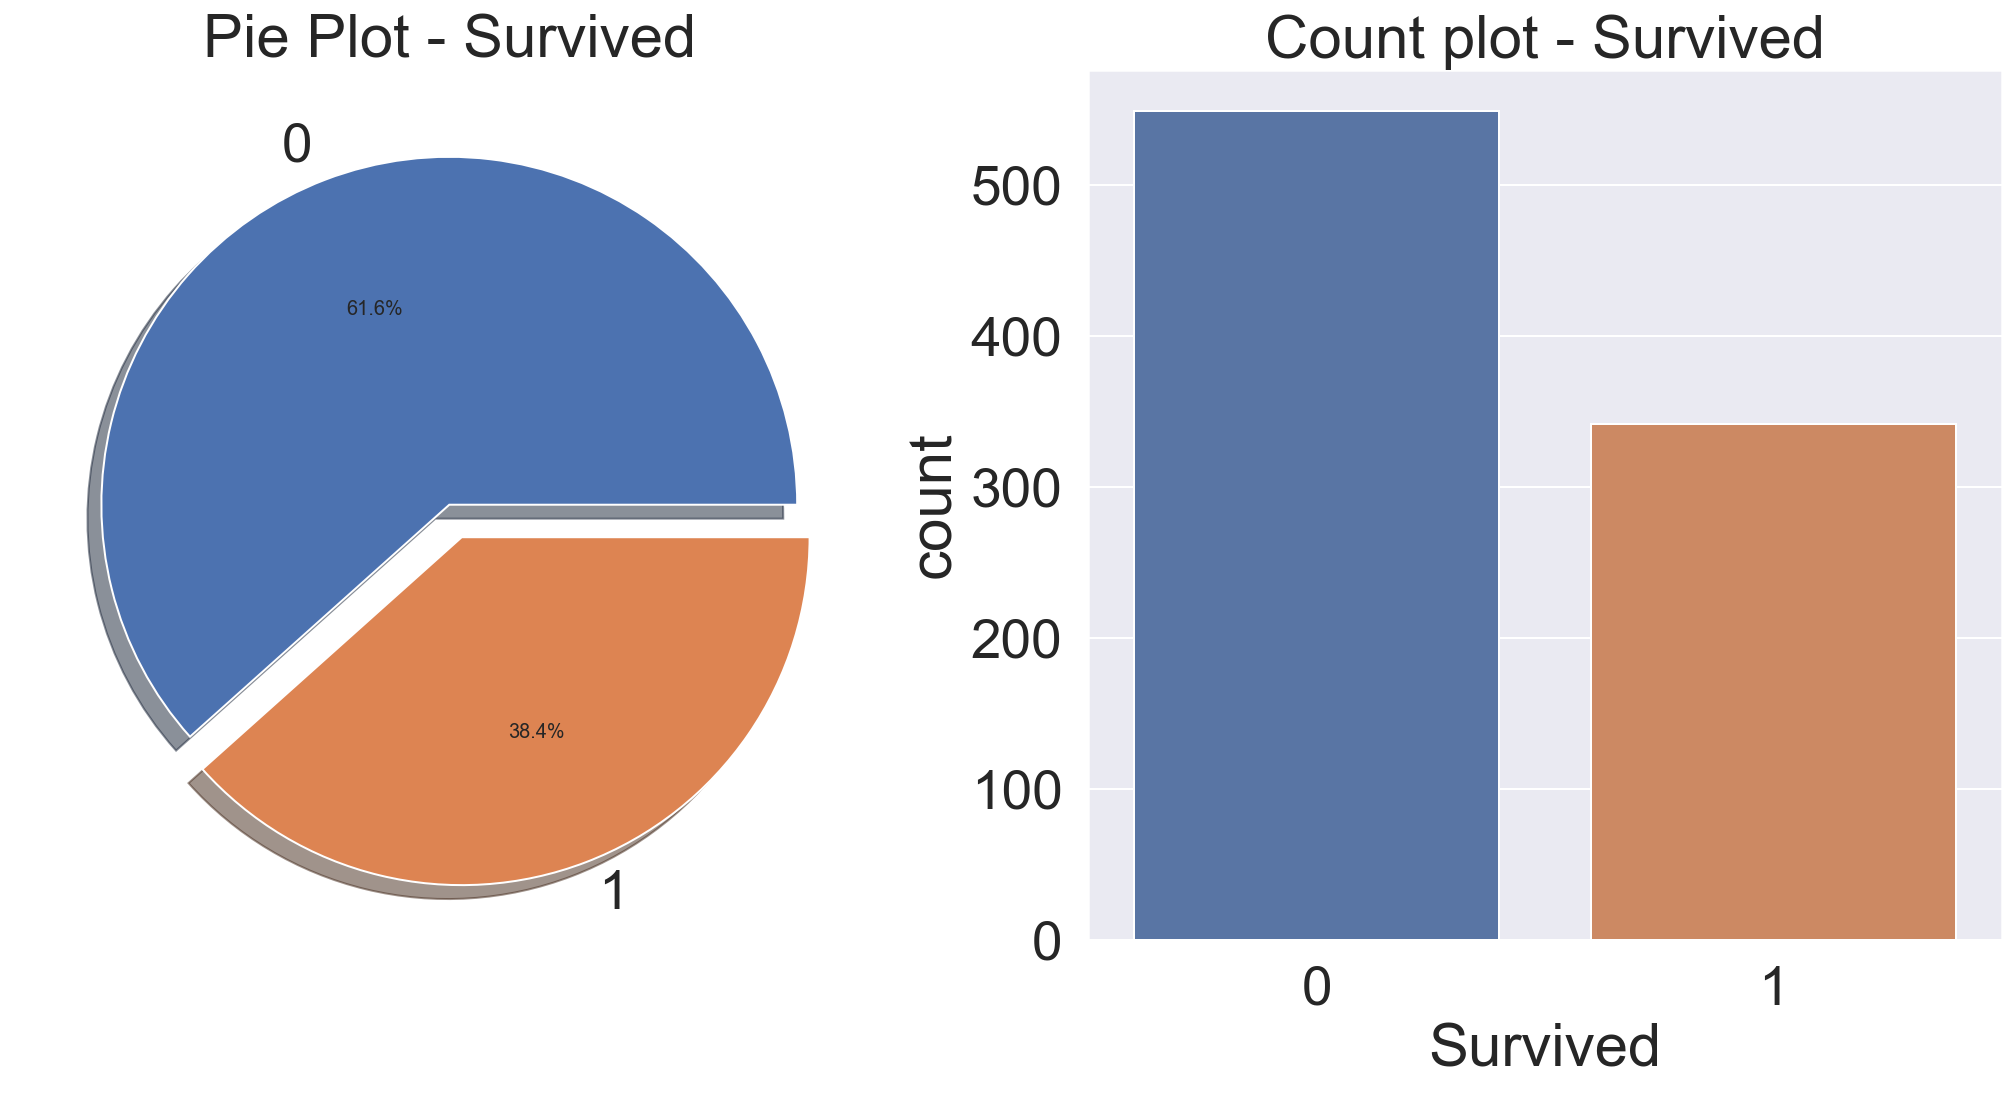

In [15]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

df_train['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%',ax=ax[0], shadow=True)
ax[0].set_title('Pie Plot - Survived')
ax[0].set_ylabel('')
sns.countplot('Survived', data=df_train, ax=ax[1])
ax[1].set_title('Count plot - Survived')

plt.show()

plt.show()

In [16]:
# 2. 데이터 분석

In [17]:
## 2.1 Pclass

In [18]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).count()

,Survived
Pclass,
1,216
2,184
3,491


In [19]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).sum()

,Survived
Pclass,
1,136
2,87
3,119


In [20]:
pd.crosstab(df_train['Pclass'], df_train["Survived"], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


<AxesSubplot:xlabel='Pclass'>

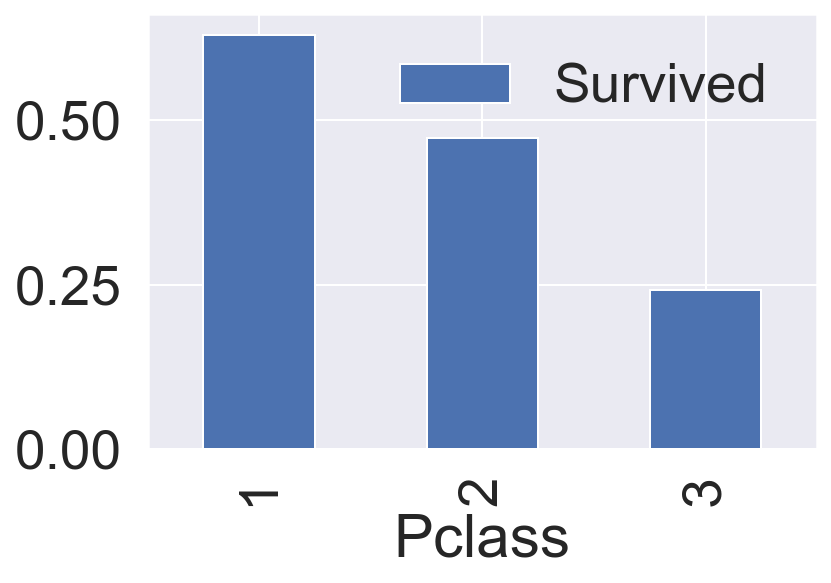

In [21]:
df_train[['Pclass', "Survived"]].groupby(['Pclass'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar()

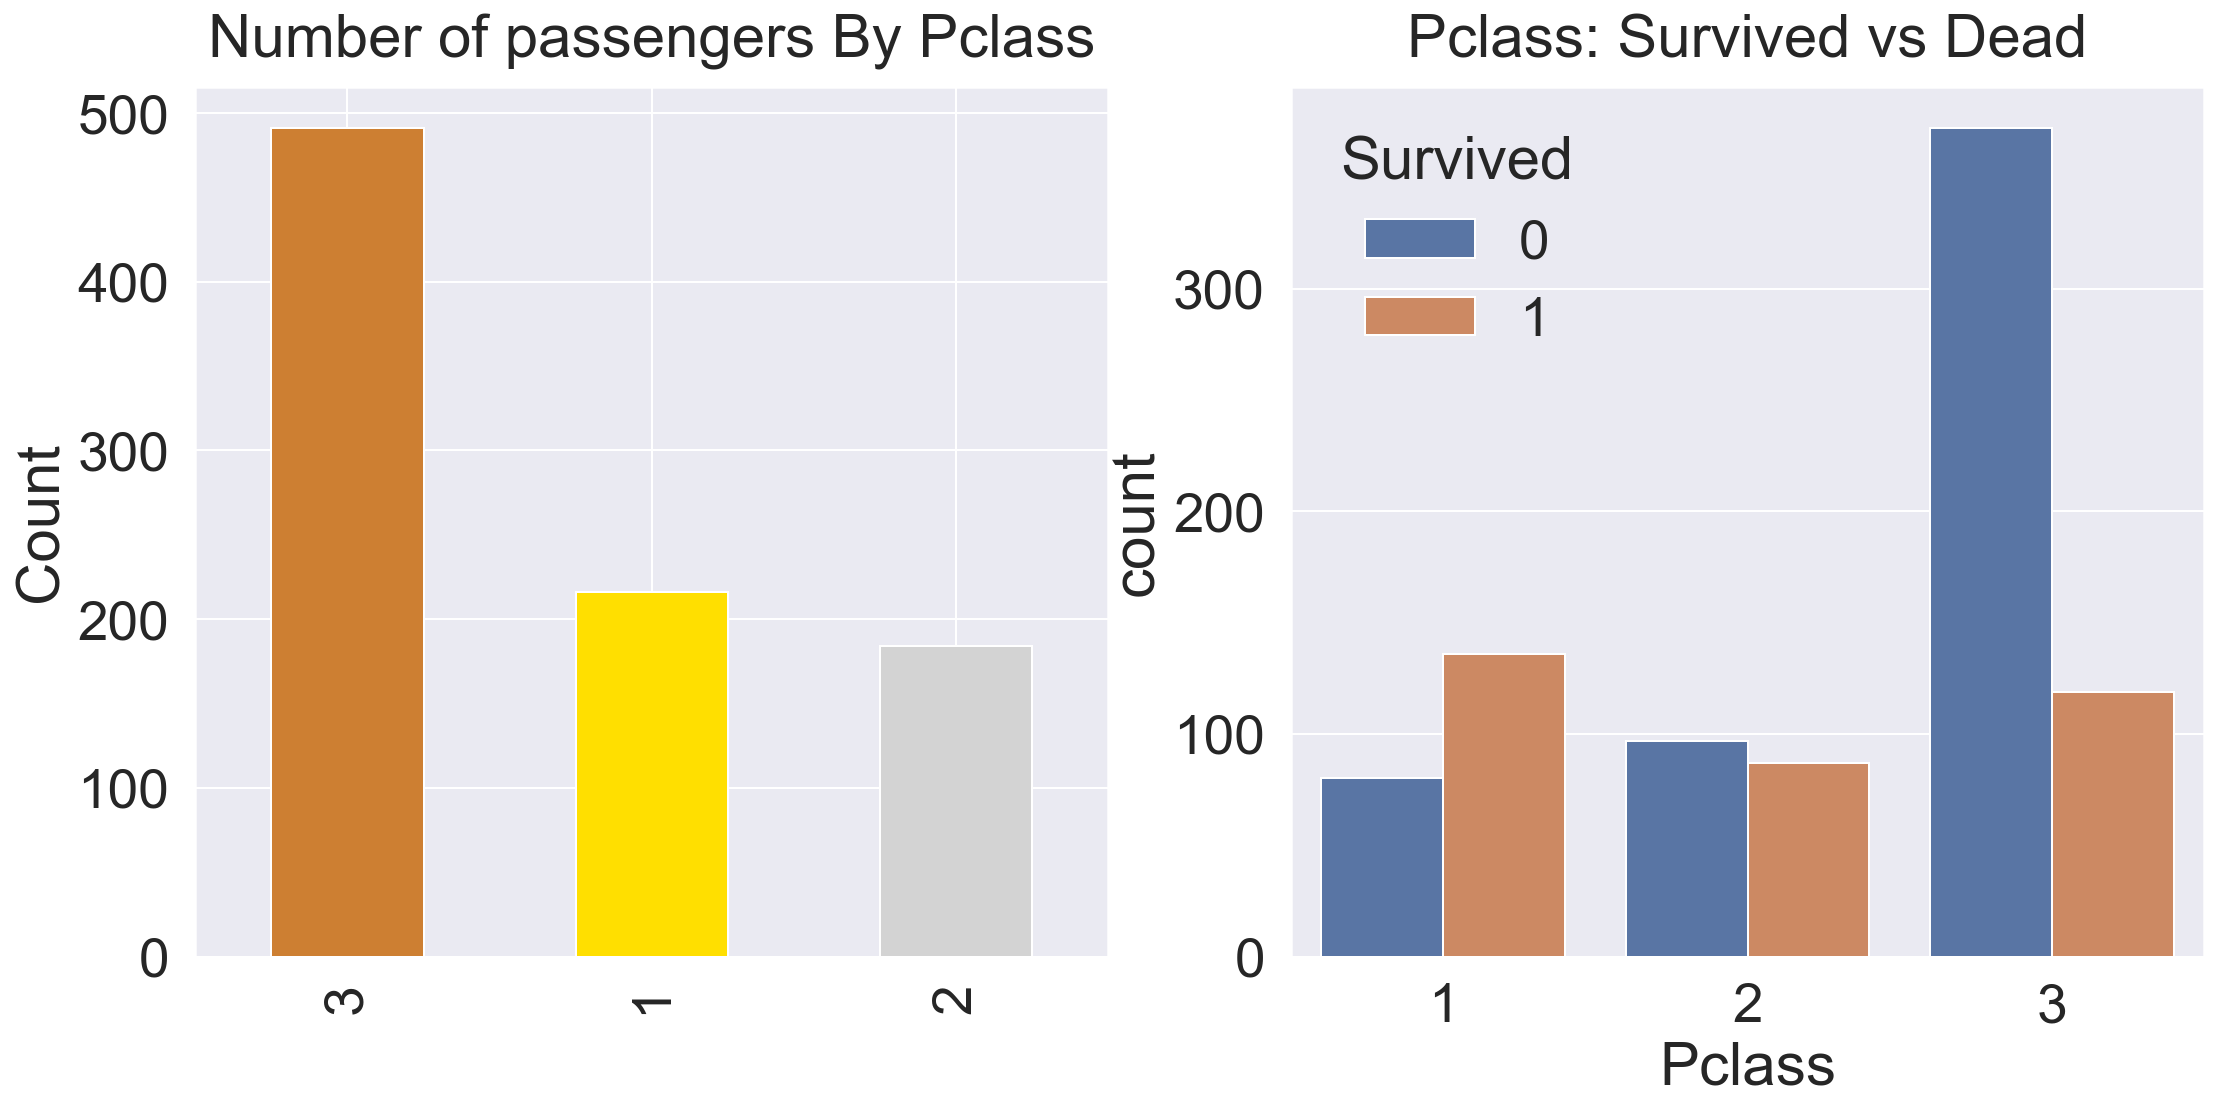

In [22]:
y_position = 1.02
f, ax = plt.subplots(1, 2, figsize=(18, 8))
df_train['Pclass'].value_counts().plot.bar(color=['#CD7F32', '#FFDF00', '#D3D3D3'], ax=ax[0])
ax[0].set_title('Number of passengers By Pclass', y=y_position)
ax[0].set_ylabel('Count')
sns.countplot('Pclass', hue="Survived", data=df_train, ax=ax[1])
ax[1].set_title('Pclass: Survived vs Dead', y=y_position)
plt.show()

In [23]:
## 2.2 Sex

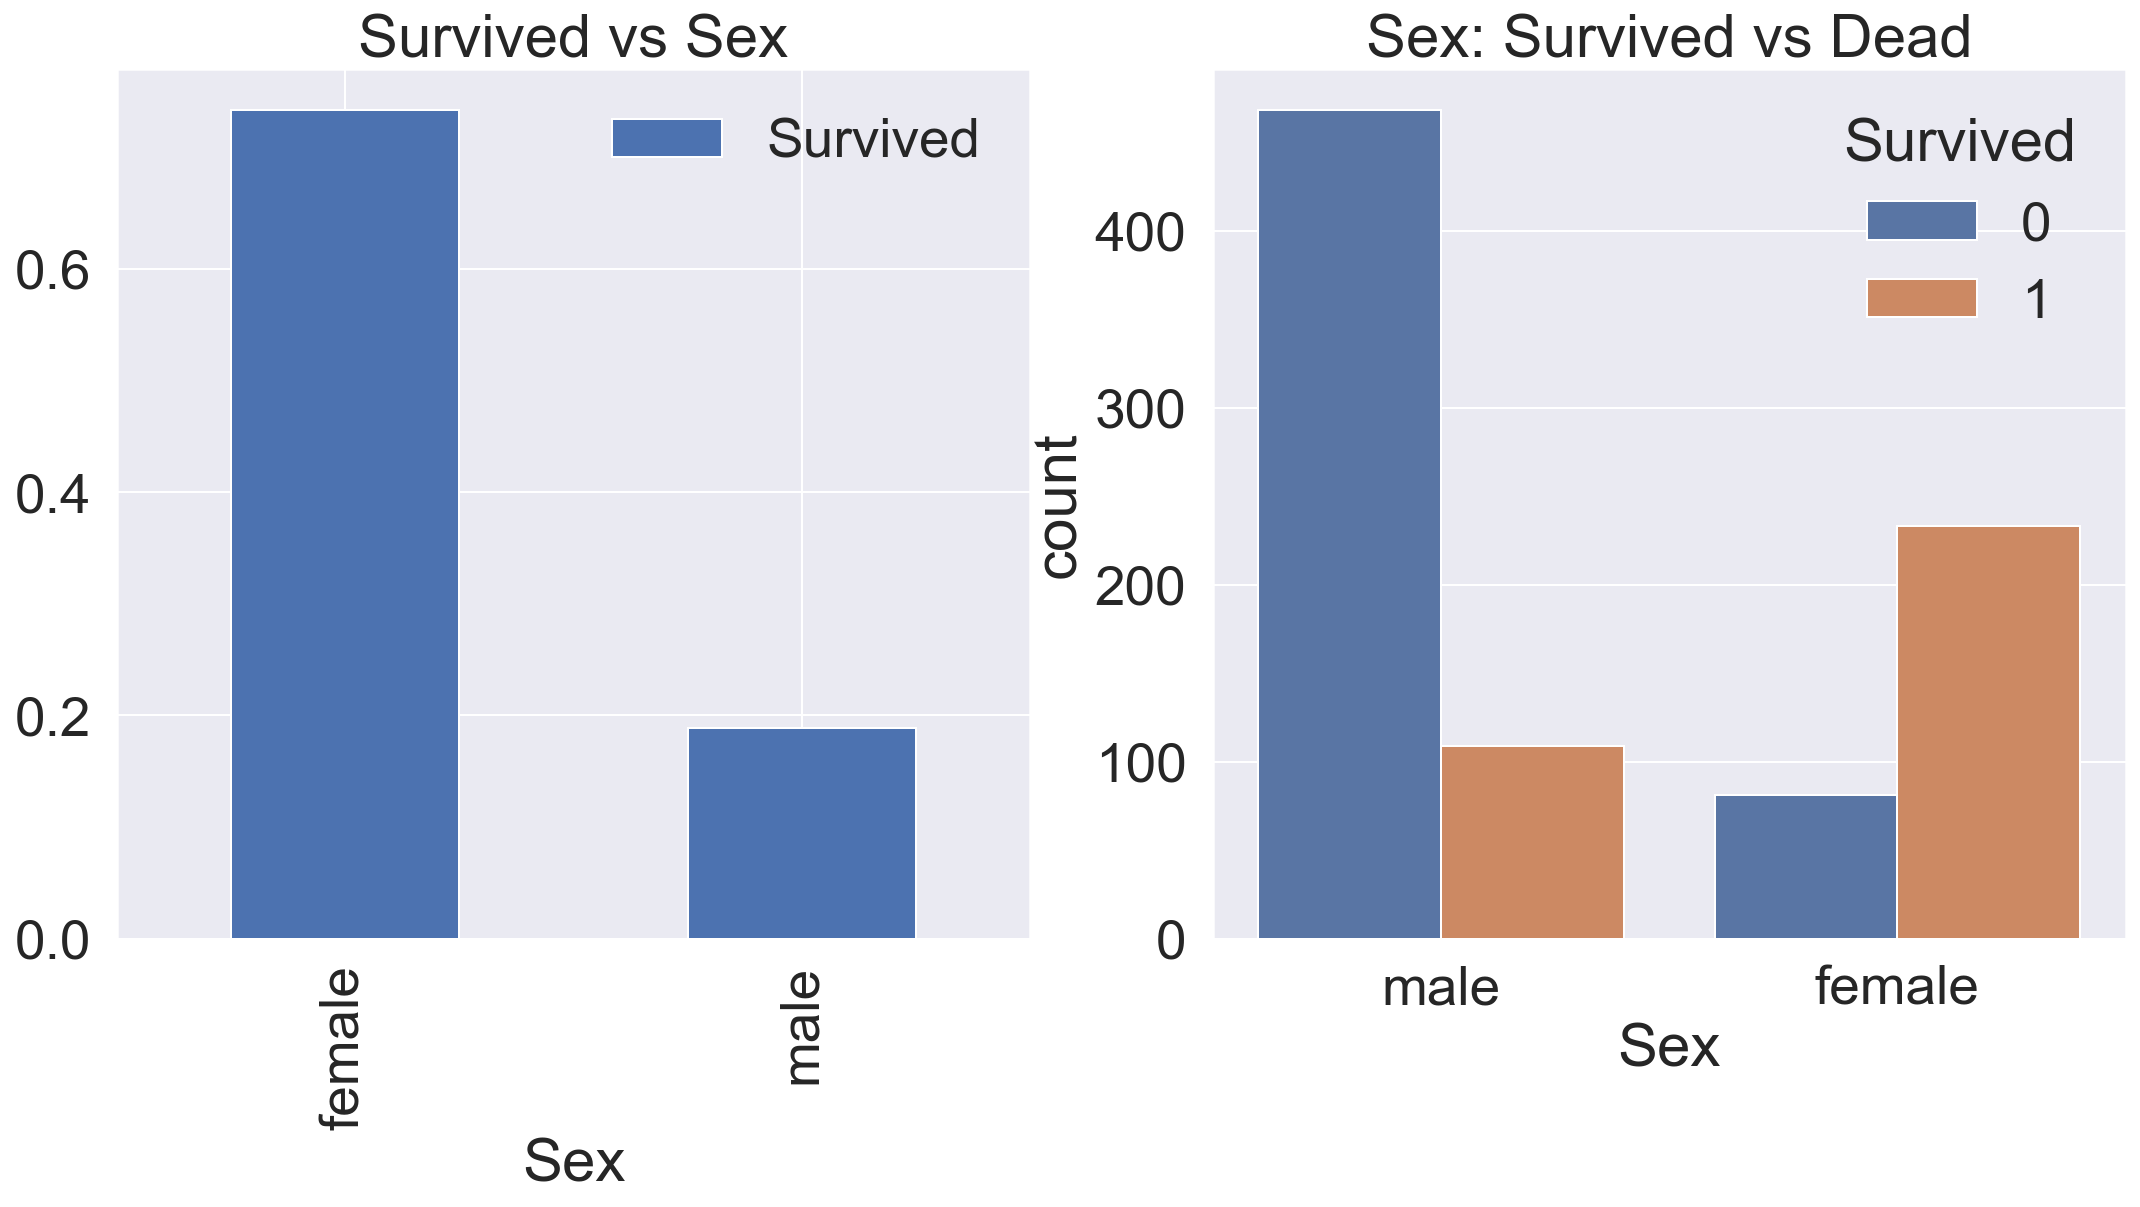

In [24]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')
plt.show()

In [25]:
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [26]:
pd.crosstab(df_train['Sex'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


In [27]:
## 2.3 Both sex and pclass

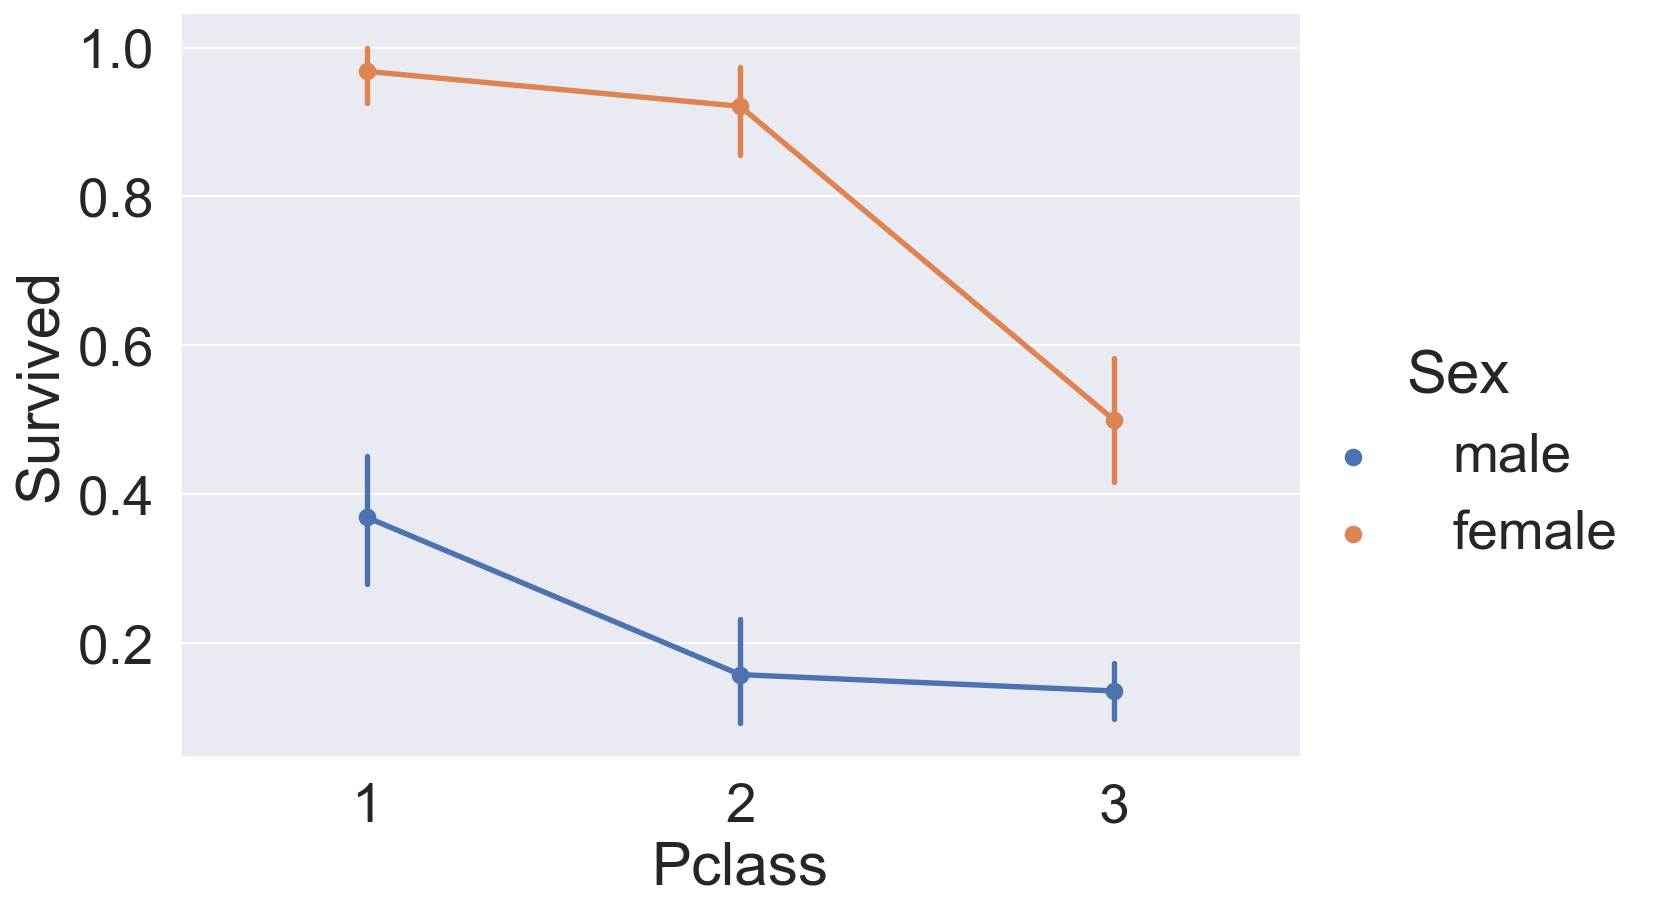

In [28]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data=df_train, size=6, aspect=1.5)

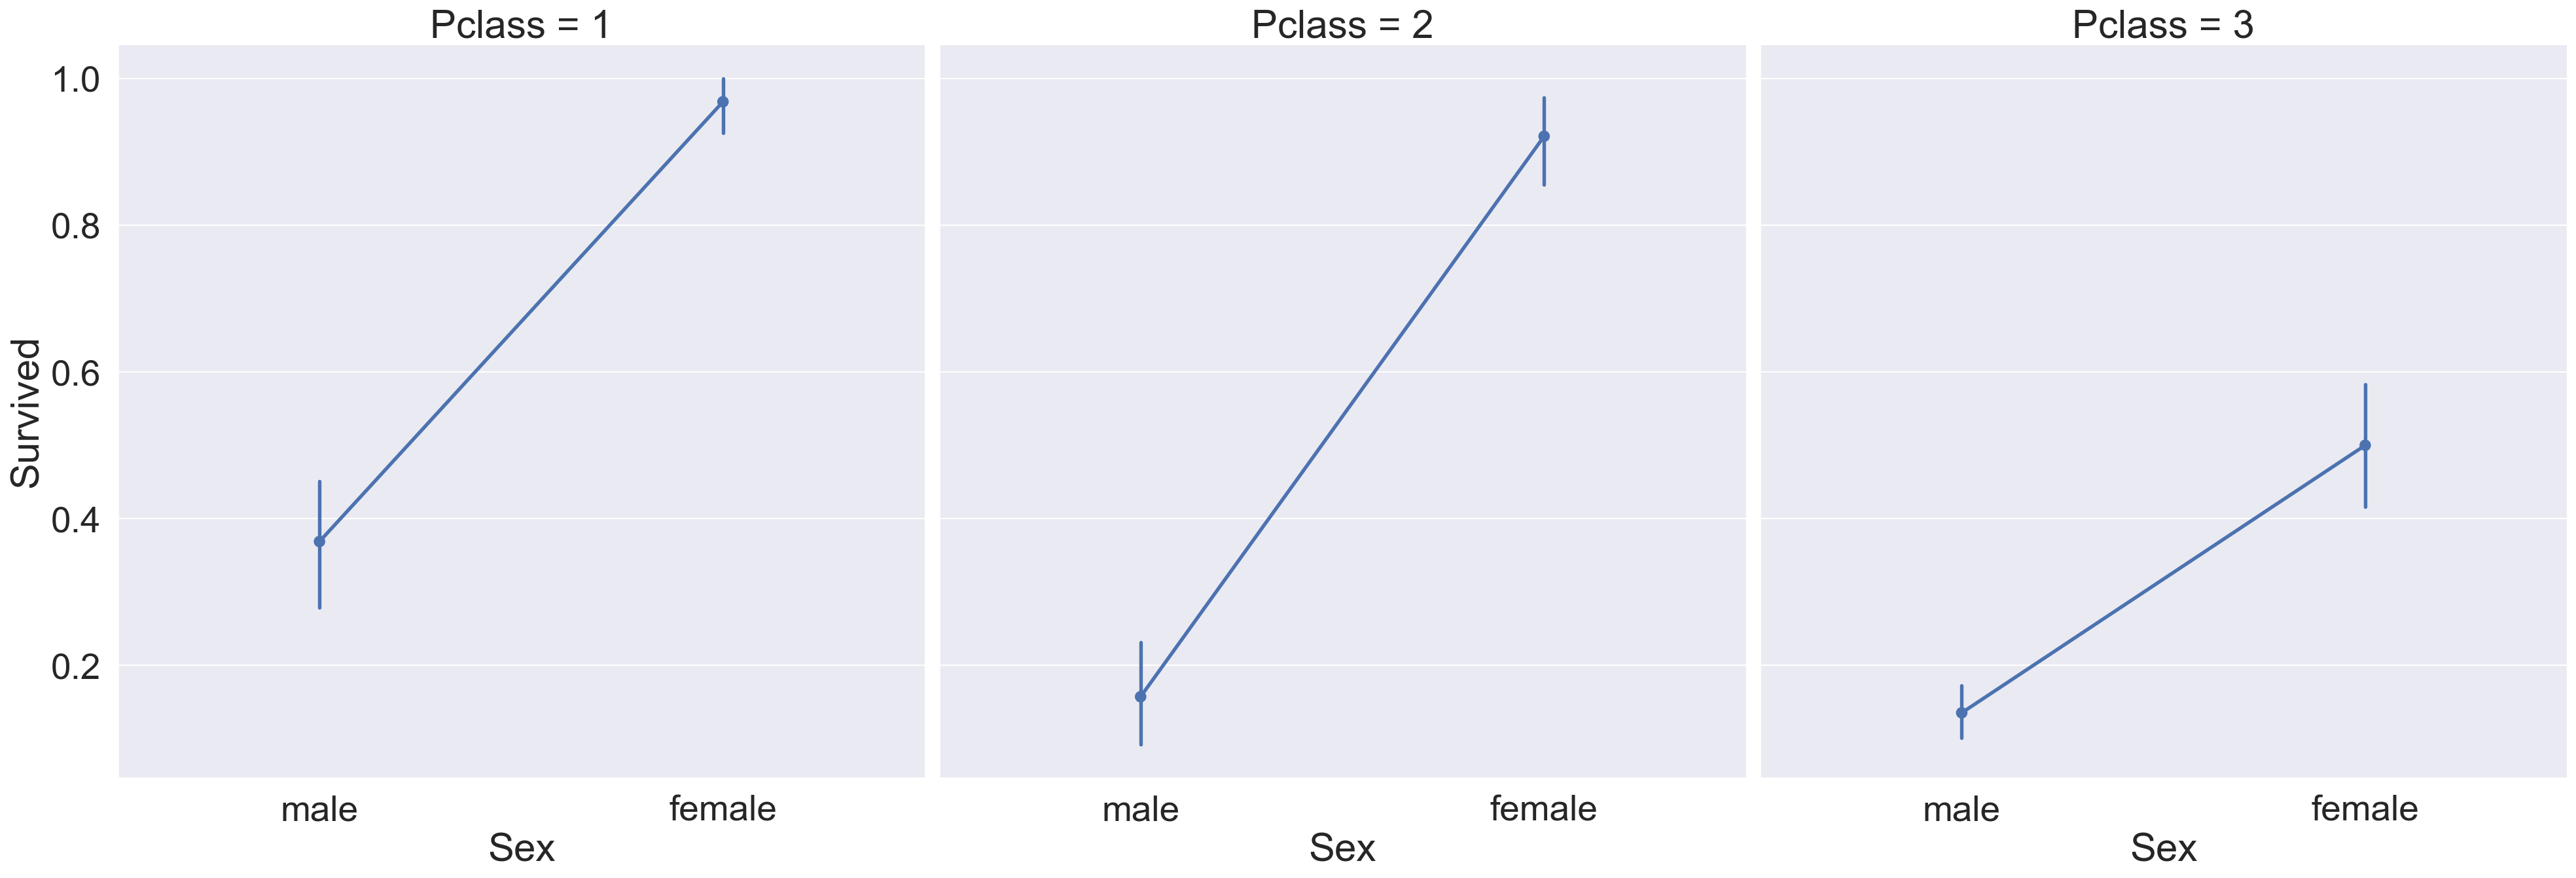

In [29]:
sns.factorplot(x='Sex', y='Survived', col='Pclass',
             data=df_train, satureation=0.5, size=9, aspect=1)

In [30]:
## 2.4 Age

In [31]:
print('제일 나미 많은 탑승객: {:.1f} Years'.format(df_train['Age'].max()))
print('제일 어린 탑승객: {:.1f} Years'. format(df_train['Age'].min()))
print('탑승객 평균 나이: {:.1f} Years'. format(df_train['Age'].mean()))

제일 나미 많은 탑승객: 80.0 Years
제일 어린 탑승객: 0.4 Years
탑승객 평균 나이: 29.7 Years


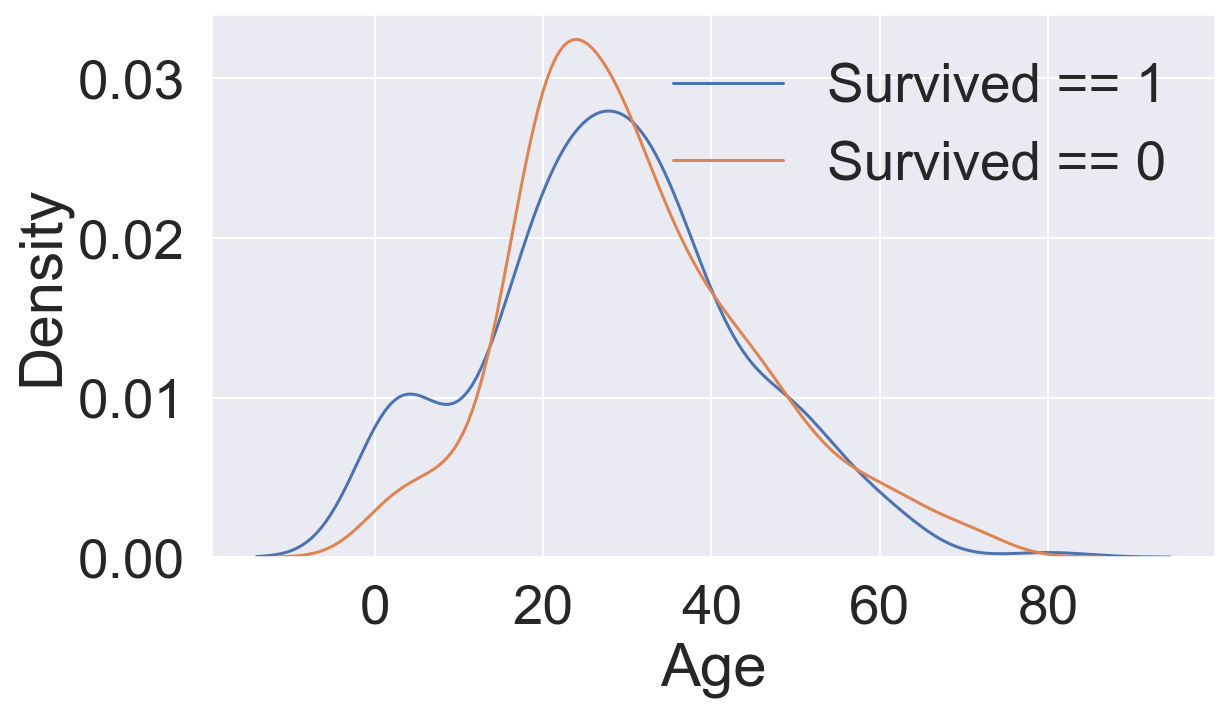

In [32]:
fig, ax = plt.subplots(1, 1, figsize=(9, 5))
sns.kdeplot(df_train[df_train['Survived'] == 1]['Age'], ax=ax)
sns.kdeplot(df_train[df_train['Survived'] == 0]['Age'], ax=ax)
plt.legend(['Survived == 1', 'Survived == 0'])
plt.show()

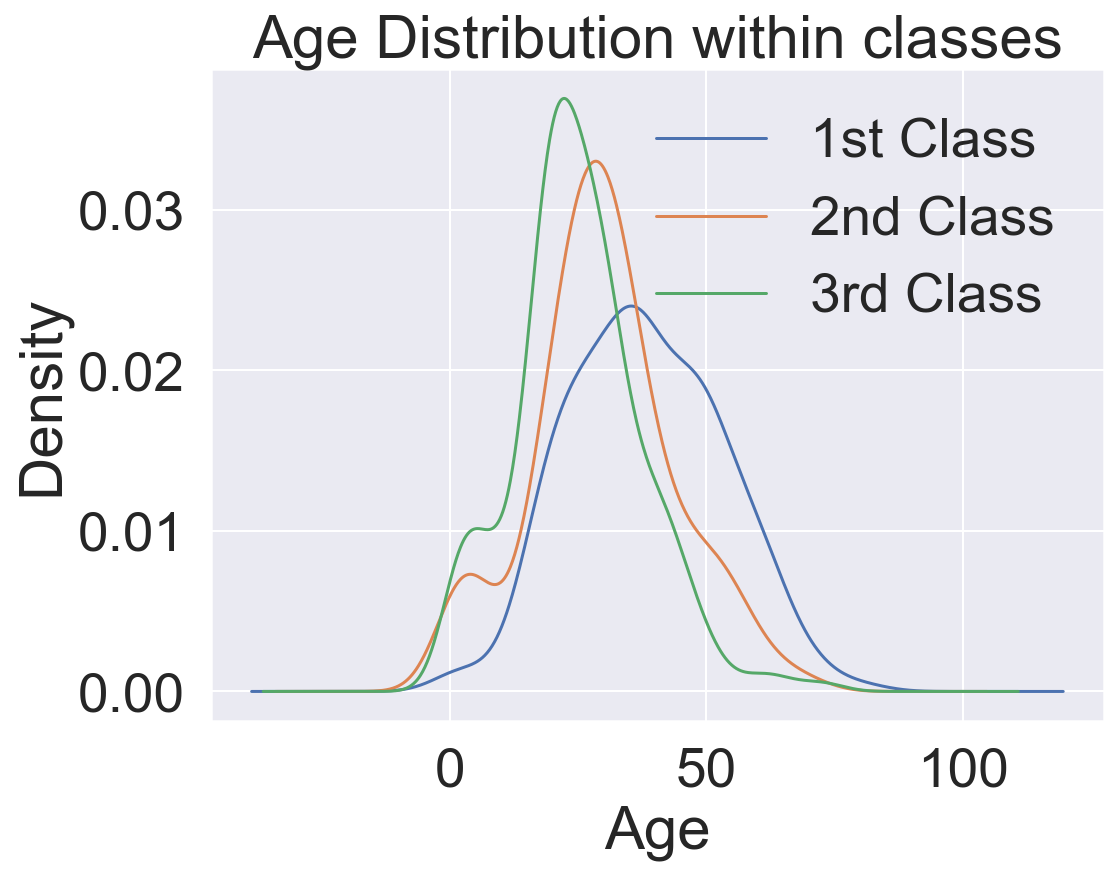

In [33]:
# Age distribution withing classes
plt.figure(figsize=(8, 6))
df_train['Age'][df_train['Pclass'] == 1].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 2].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 3].plot(kind='kde')

plt.xlabel('Age')
plt.title('Age Distribution within classes')
plt.legend(['1st Class', '2nd Class', '3rd Class'])

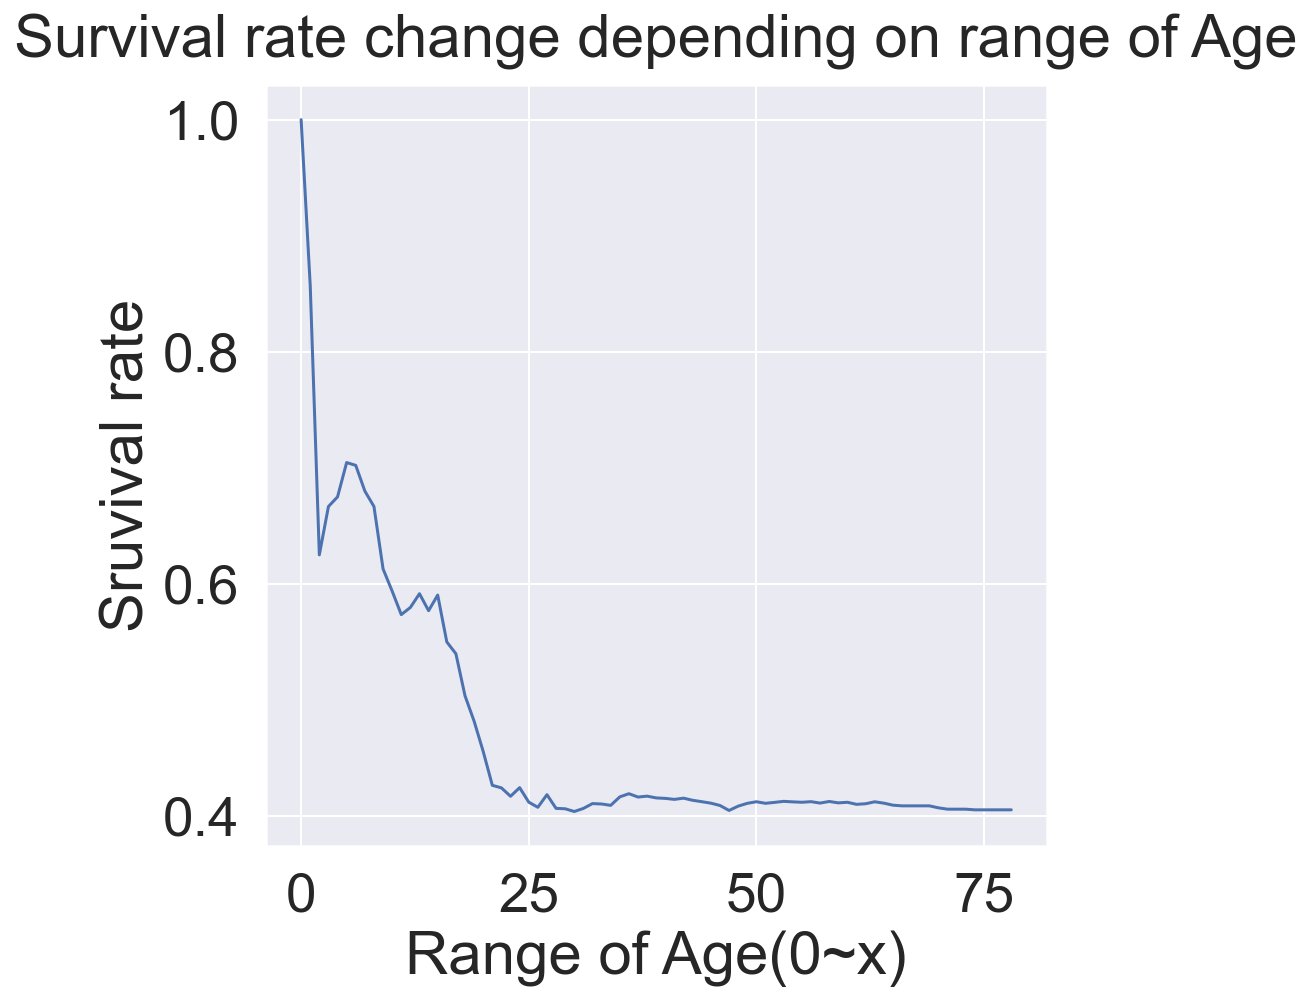

In [34]:
cummulate_survival_ratio = []
for i in range(1, 80):
    cummulate_survival_ratio.append(df_train[df_train['Age'] < i]['Survived'].sum() / len(df_train[df_train['Age'] < i]['Survived']))
    
plt.figure(figsize=(7, 7))
plt.plot(cummulate_survival_ratio)
plt.title('Survival rate change depending on range of Age', y=1.02)
plt.ylabel('Sruvival rate')
plt.xlabel('Range of Age(0~x)')
plt.show()

In [35]:
## 2.5 Pclass, Sex, Age

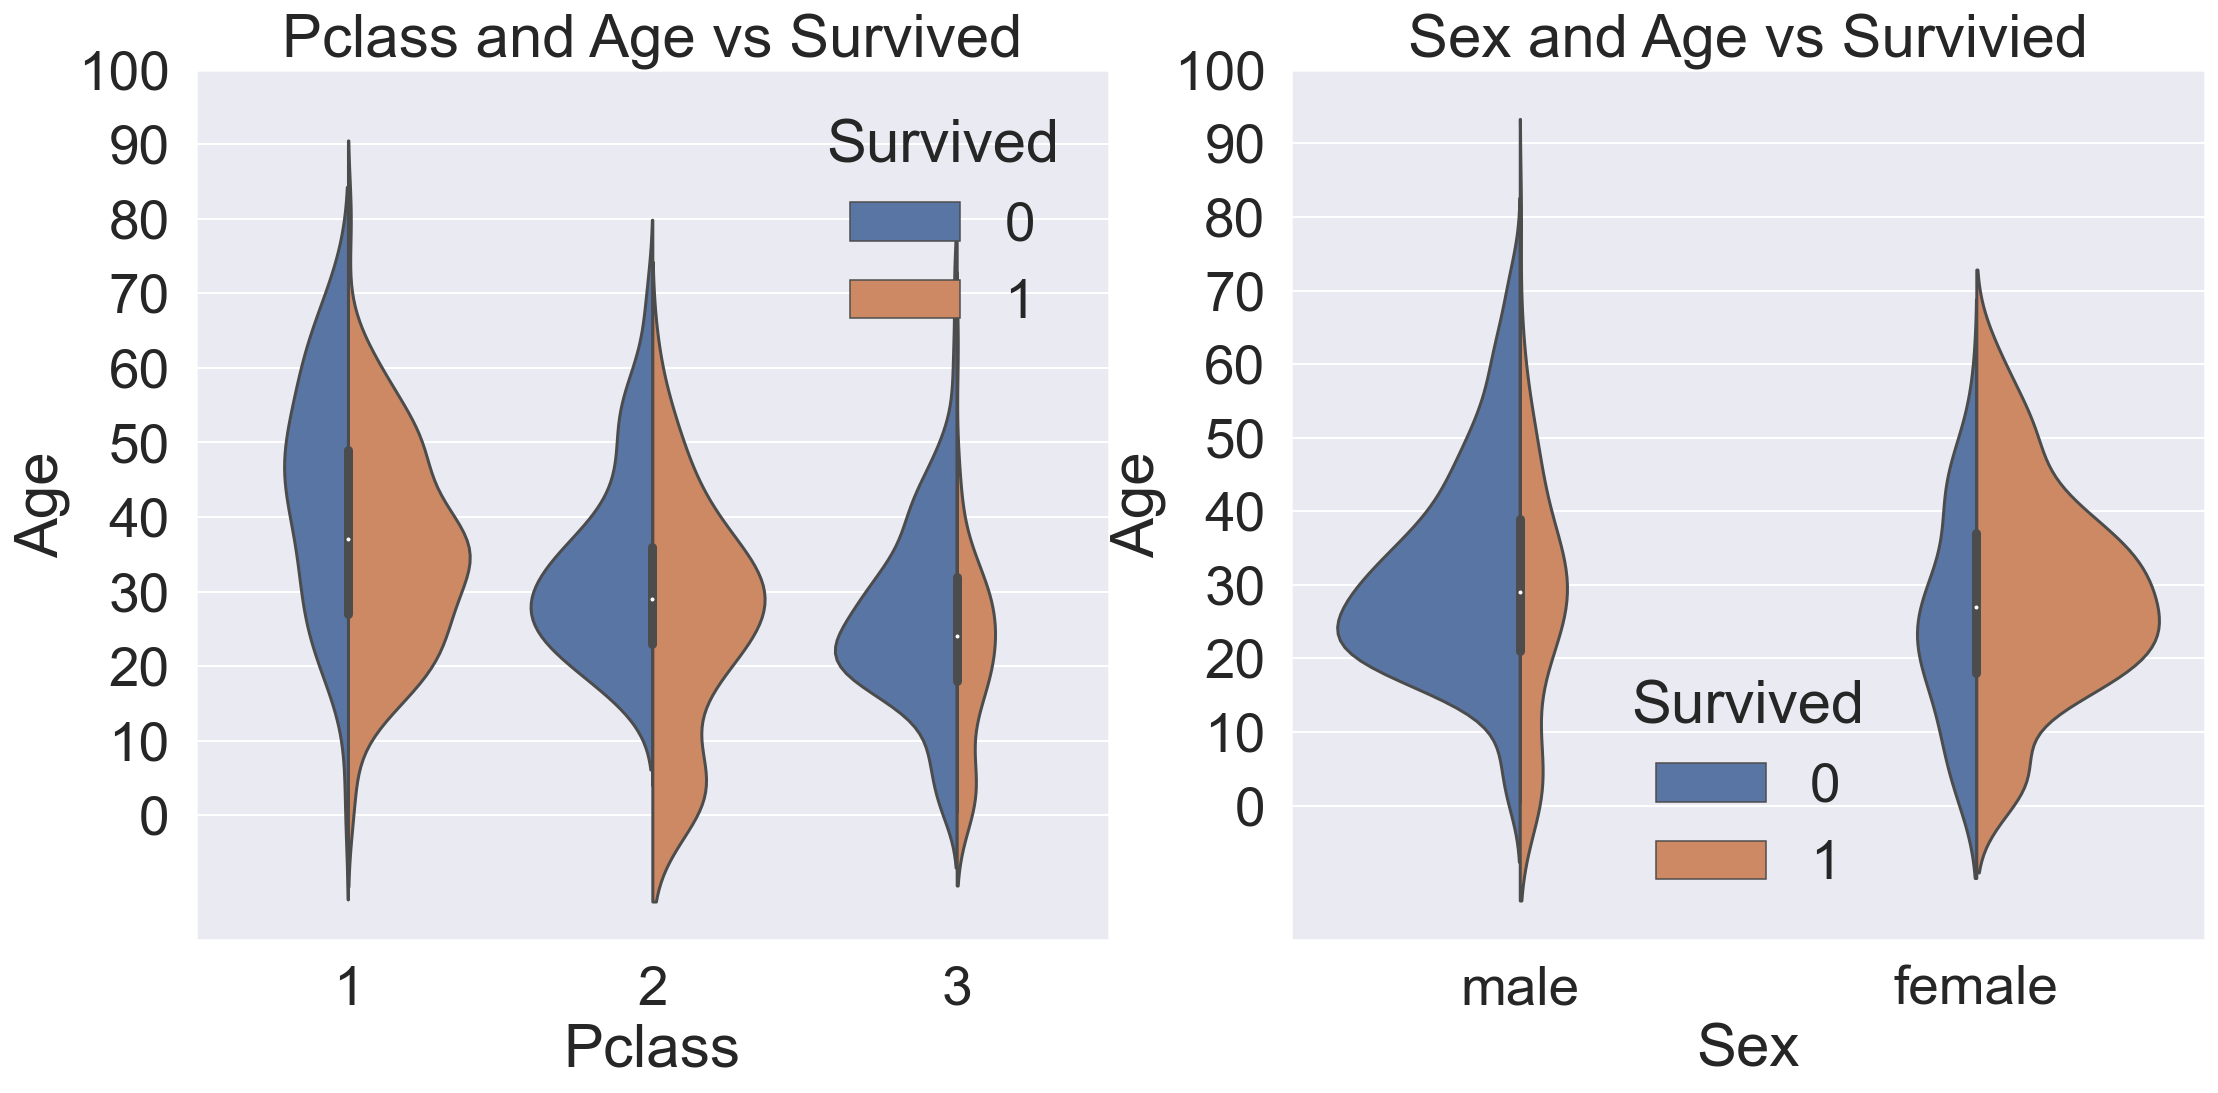

In [36]:
f, ax = plt.subplots(1, 2, figsize=(18,8))
sns.violinplot("Pclass", "Age", hue="Survived", data=df_train, scale="count", split=True, ax=ax[0])
ax[0].set_title("Pclass and Age vs Survived")
ax[0].set_yticks(range(0,110,10))
sns.violinplot("Sex", "Age", hue="Survived", data=df_train, scale="count", split=True, ax=ax[1])
ax[1].set_title("Sex and Age vs Survivied")
ax[1].set_yticks(range(0,110,10))
plt.show()

In [37]:
## 2.6 Embarked(탑승항구)

<AxesSubplot:xlabel='Embarked'>

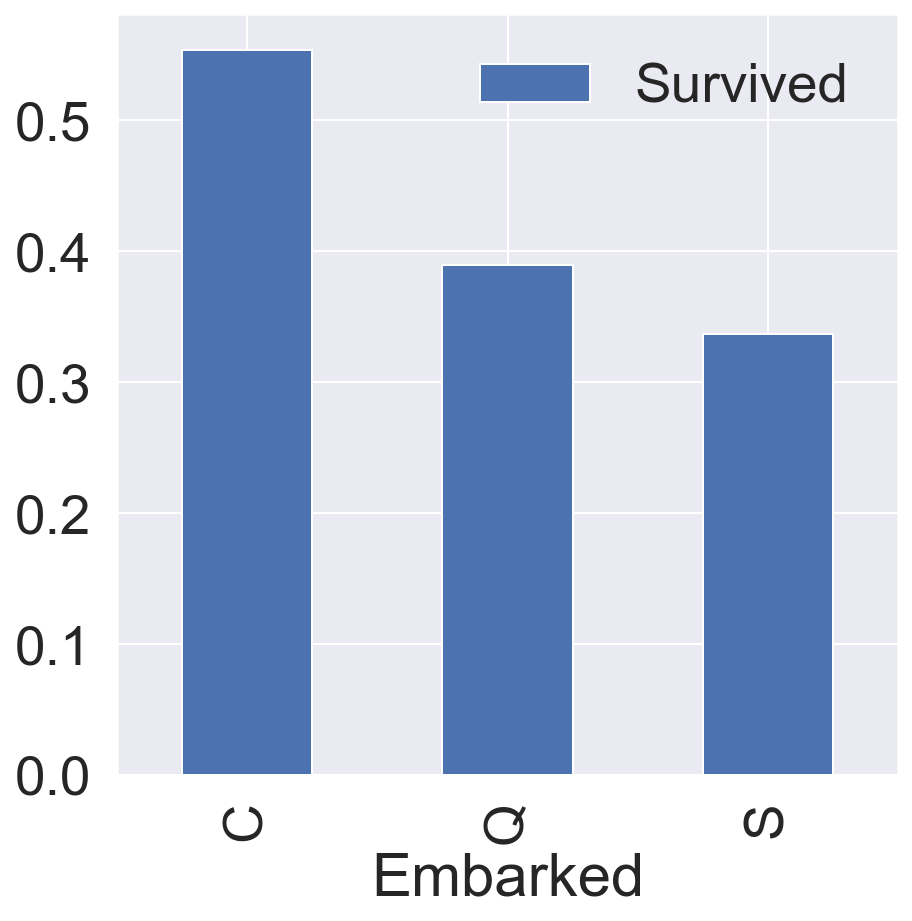

In [38]:
f, ax = plt.subplots(1, 1, figsize=(7, 7))
df_train[["Embarked", "Survived"]].groupby(["Embarked"], as_index=True).mean().sort_values(by="Survived", ascending=False).plot.bar(ax=ax)

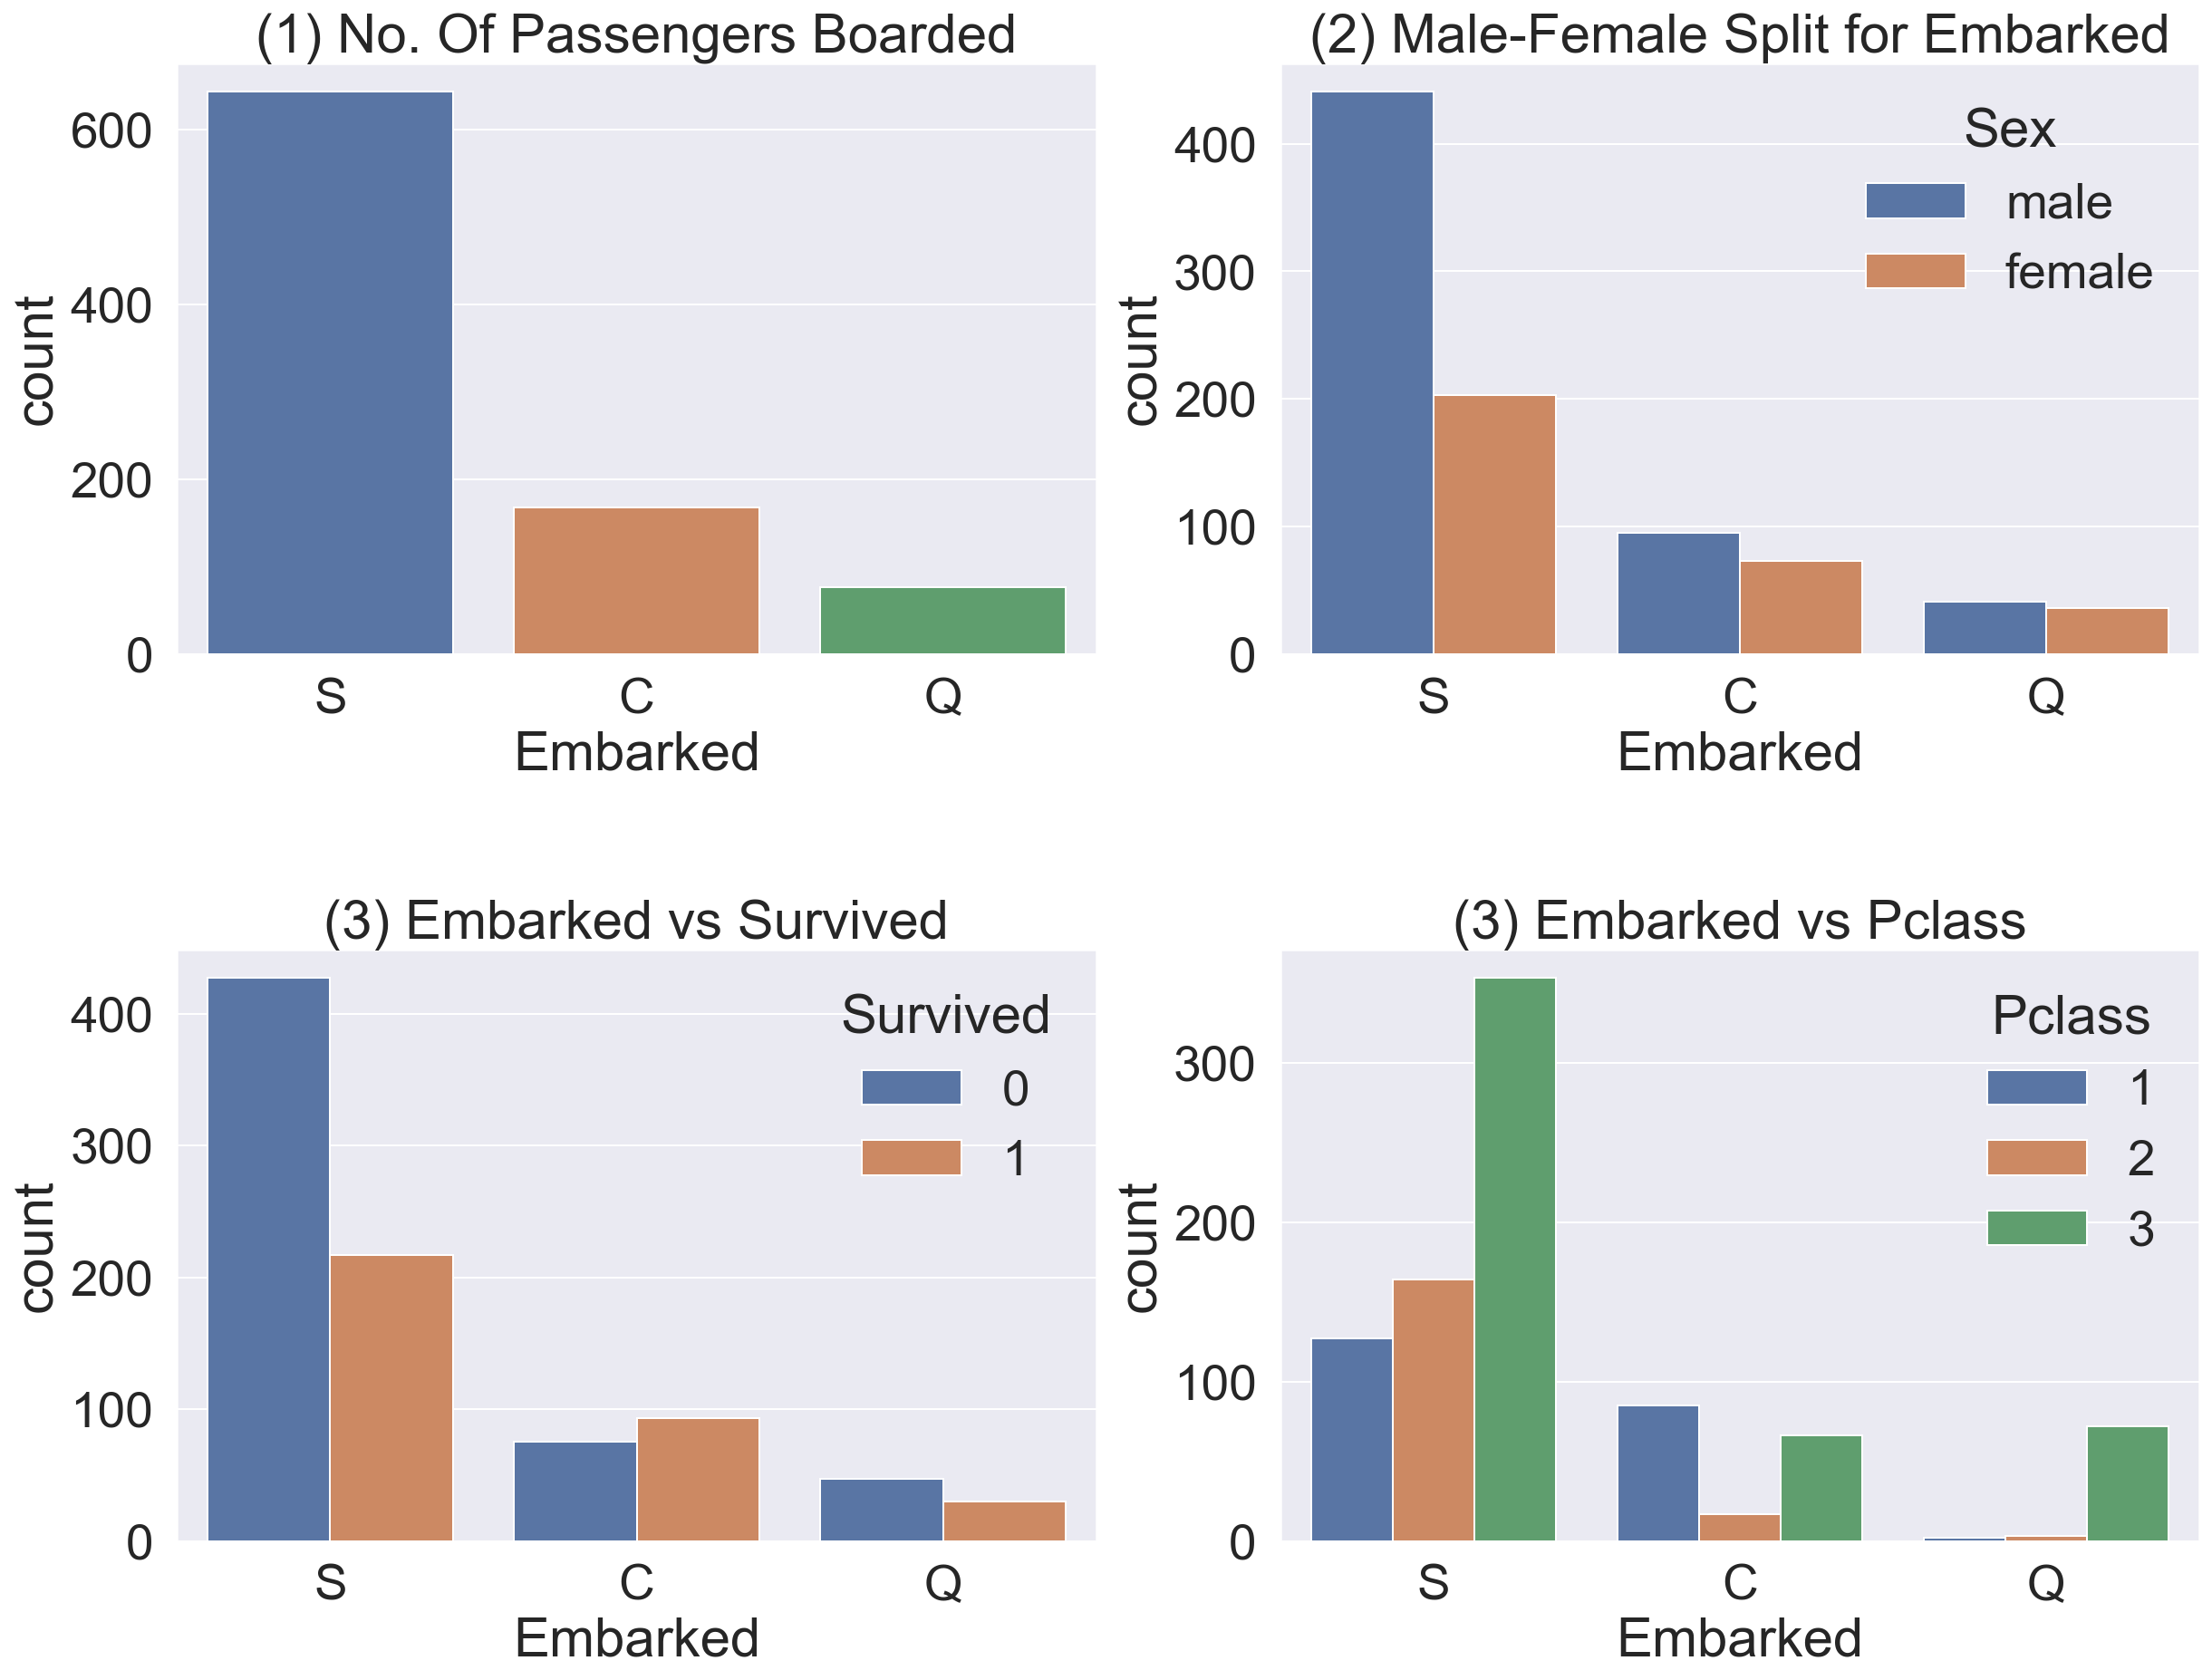

In [39]:
f, ax = plt.subplots(2, 2, figsize=(20, 15))
sns.countplot("Embarked", data=df_train, ax=ax[0,0])
ax[0,0].set_title('(1) No. Of Passengers Boarded')
sns.countplot("Embarked", hue="Sex", data=df_train, ax=ax[0,1])
ax[0,1].set_title('(2) Male-Female Split for Embarked')
sns.countplot("Embarked", hue="Survived", data=df_train, ax=ax[1,0])
ax[1,0].set_title('(3) Embarked vs Survived')
sns.countplot("Embarked", hue="Pclass", data=df_train, ax=ax[1,1])
ax[1,1].set_title('(3) Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [40]:
## 2.7 Fmaily - SibSp(형제 자매) + Parch(부모, 자녀)

In [41]:
df_train["FamilySize"] = df_train["SibSp"] + df_train["Parch"] + 1.#자신을 포함해야해서 1을 더함
df_test["FamilySize"] = df_test["SibSp"] + df_test["Parch"] + 1

In [42]:
print("Maximum size of Family: ", df_train["FamilySize"].max())
print("Minimum size of Family: ", df_train["FamilySize"].min())

Maximum size of Family:  11.0
Minimum size of Family:  1.0


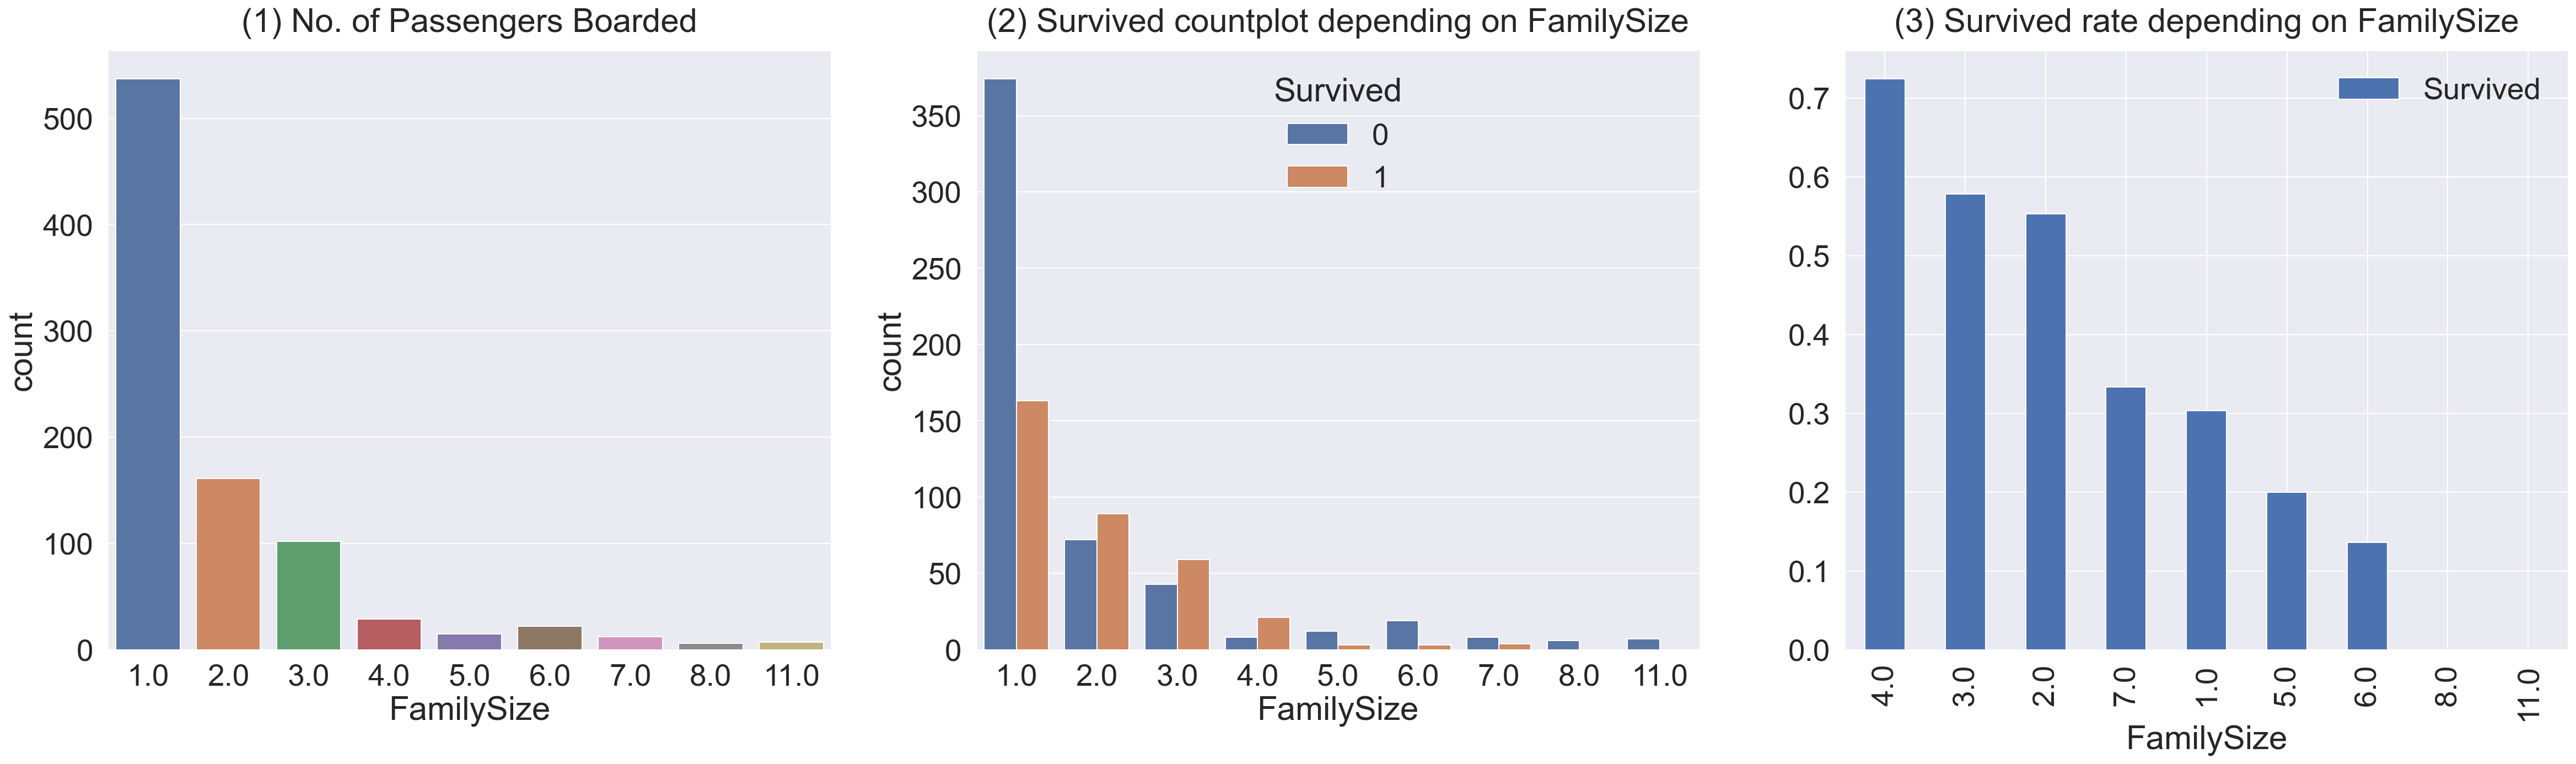

In [43]:
f, ax = plt.subplots(1, 3, figsize=(40, 10))
sns.countplot("FamilySize", data=df_train, ax=ax[0])
ax[0].set_title("(1) No. of Passengers Boarded", y=1.02)

sns.countplot("FamilySize", hue="Survived", data=df_train, ax=ax[1])
ax[1].set_title("(2) Survived countplot depending on FamilySize", y=1.02)

df_train[["FamilySize", "Survived"]].groupby(["FamilySize"], as_index=True).mean().sort_values(by="Survived", ascending=False).plot.bar(ax=ax[2])
ax[2].set_title('(3) Survived rate depending on FamilySize', y=1.02)

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [44]:
## 2.8 Fare

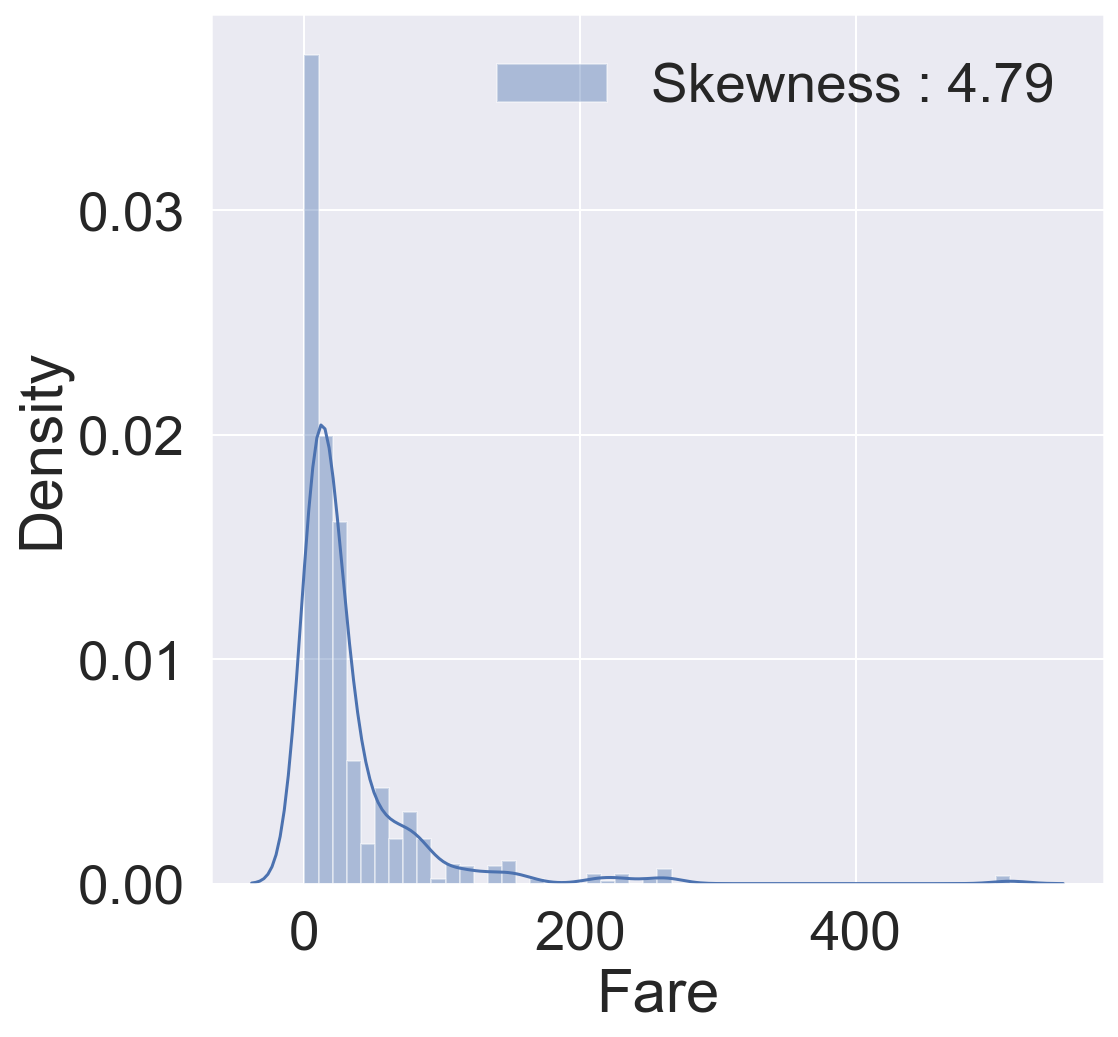

In [45]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))

g = sns.distplot(df_train["Fare"], color="b", label="Skewness : {:.2f}".format(df_train["Fare"].skew()), ax=ax)
g = g.legend(loc="best")

In [46]:
df_test.loc[df_test.Fare.isnull(), "Fare"] = df_test["Fare"].mean() # testset에있는 nan value값을 평균으로 치환함

df_train["Fare"] = df_train["Fare"].map(lambda i: np.log(i) if i > 0 else 0)
df_test["Fare"] = df_test["Fare"].map(lambda i : np.log(i) if i > 0 else 0)

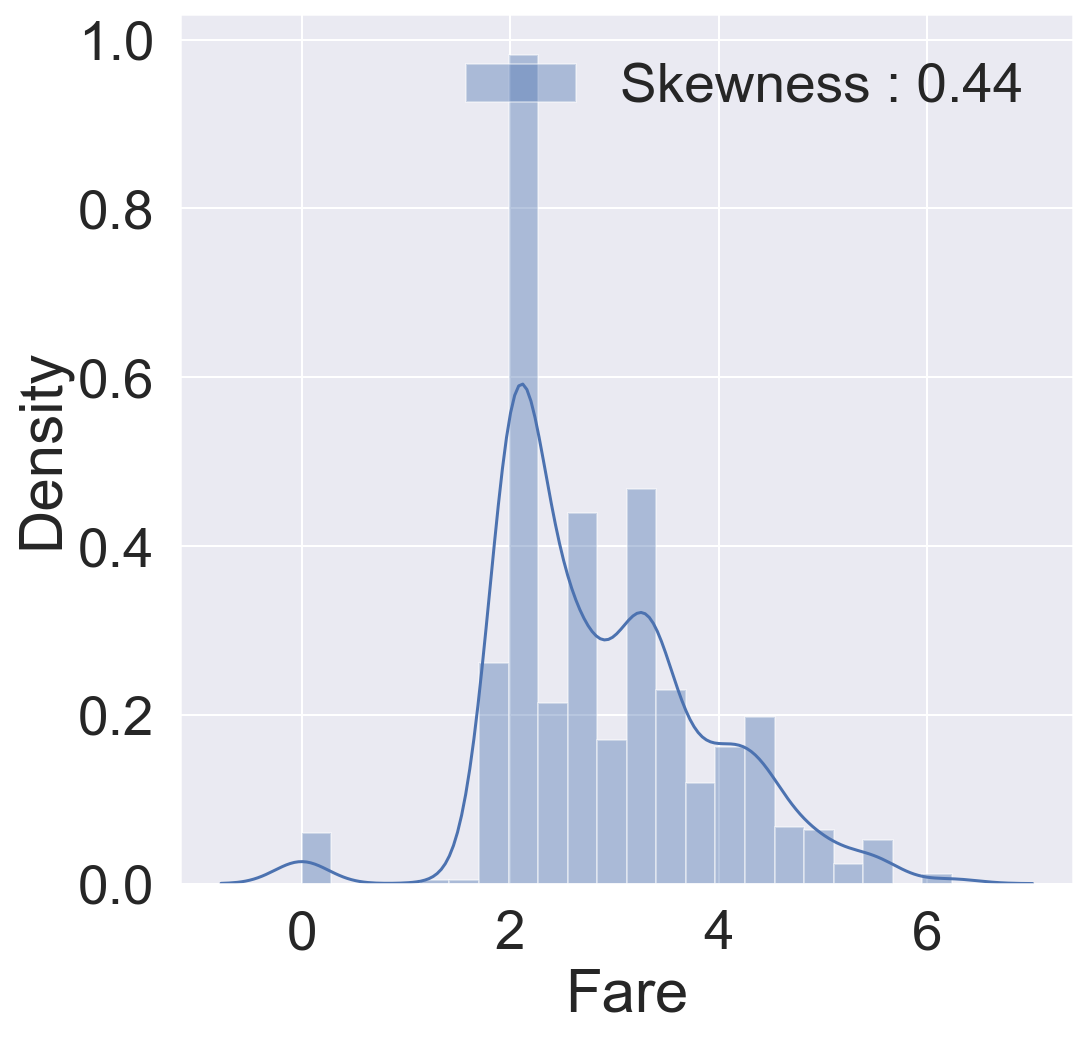

In [47]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
g = sns.distplot(df_train["Fare"], color="b", label="Skewness : {:.2f}".format(df_train["Fare"].skew()), ax=ax)
g = g.legend(loc="best")

In [48]:
## 2.9 Cabin

In [49]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,1.981001,NaN,S,2.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.266662,C85,C,2.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.070022,NaN,S,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.972177,C123,S,2.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.085672,NaN,S,1.0


In [50]:
## 2.10 Ticket

In [51]:
df_train["Ticket"].value_counts()

347082                7
CA. 2343              7
1601                  7
CA 2144               6
3101295               6
                     ..
SOTON/O.Q. 3101311    1
31418                 1
A./5. 2152            1
PC 17590              1
3101264               1
Name: Ticket, Length: 681, dtype: int64

In [52]:
# 3. Feature engineering

In [53]:
## 3.1 Fill Null

In [54]:
### 3.1.1 Fill Null in age using title

In [55]:
df_train["Initial"] = df_train.Name.str.extract('([A-Za-z]+)\.') #lets extract the Salutations
df_test["Initial"] = df_test.Name.str.extract('([A-Za-z]+)\.') # lets extract the Salutations

In [56]:
pd.crosstab(df_train['Initial'], df_train["Sex"]).T.style.background_gradient(cmap='summer_r') #Checking the Initials with the Sex

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [57]:
df_train["Initial"].replace(["Mlle", "Mme", "Ms", "Dr", "Major", "Lady", "Countess", "Jonkheer", "Col", "Rev", "Capt", "Sir", "Don", "Dona"],
                            ["Miss", "Miss", "Miss", "Mr", "Mr", "Mrs", "Mrs", "Other", "Other", "Other", "Mr", "Mr", "Mr", "Mr"],inplace=True)

df_test["Initial"].replace(["Mlle", "Mme", "Ms", "Dr", "Major", "Lady", "Countess", "Jonkheer", "Col", "Rev", "Capt", "Sir", "Don", "Dona"],
                            ["Miss", "Miss", "Miss", "Mr", "Mr", "Mrs", "Mrs", "Other", "Other", "Other", "Mr", "Mr", "Mr", "Mr"],inplace=True)

In [58]:
df_train.groupby("Initial").mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
Initial,,,,,,,,
Master,414.975000,0.575000,2.625000,4.574167,2.300000,1.375000,3.340710,4.675000
Miss,411.741935,0.704301,2.284946,21.860000,0.698925,0.537634,3.123713,2.236559
Mr,455.880907,0.162571,2.381853,32.739609,0.293006,0.151229,2.651507,1.444234
Mrs,456.393701,0.795276,1.984252,35.981818,0.692913,0.818898,3.443751,2.511811
Other,564.444444,0.111111,1.666667,45.888889,0.111111,0.111111,2.641605,1.222222


<AxesSubplot:xlabel='Initial'>

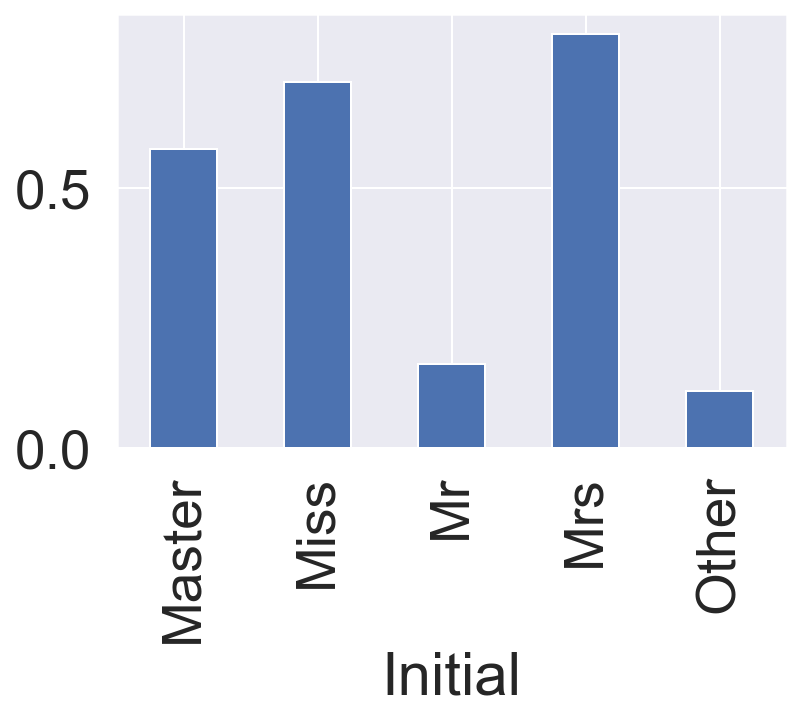

In [59]:
df_train.groupby("Initial")["Survived"].mean().plot.bar()

In [60]:
df_train.groupby("Initial").mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
Initial,,,,,,,,
Master,414.975000,0.575000,2.625000,4.574167,2.300000,1.375000,3.340710,4.675000
Miss,411.741935,0.704301,2.284946,21.860000,0.698925,0.537634,3.123713,2.236559
Mr,455.880907,0.162571,2.381853,32.739609,0.293006,0.151229,2.651507,1.444234
Mrs,456.393701,0.795276,1.984252,35.981818,0.692913,0.818898,3.443751,2.511811
Other,564.444444,0.111111,1.666667,45.888889,0.111111,0.111111,2.641605,1.222222


In [61]:
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=="Mr"),"Age"] = 33
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=="Mrs"),"Age"] = 36
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=="Master"),"Age"] = 5
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=="Miss"),"Age"] = 22
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=="Other"),"Age"] = 46

df_test.loc[(df_train.Age.isnull())&(df_train.Initial=="Mr"),"Age"] = 33
df_test.loc[(df_train.Age.isnull())&(df_train.Initial=="Mrs"),"Age"] = 36
df_test.loc[(df_train.Age.isnull())&(df_train.Initial=="Master"),"Age"] = 5
df_test.loc[(df_train.Age.isnull())&(df_train.Initial=="Miss"),"Age"] = 22
df_test.loc[(df_train.Age.isnull())&(df_train.Initial=="Other"),"Age"] = 46

In [62]:
### 3.1.2 Fill Null in Embarked

In [63]:
print("Embarked has", sum(df_train["Embarked"].isnull()),"Null values")

Embarked has 2 Null values


In [64]:
df_train["Embarked"].fillna("S", inplace=True)

In [65]:
## 3.2 Change Age(continuous to categorical)

In [66]:
df_train["Age_cat"] = 0
df_train.loc[df_train["Age"] < 10, "Age_cat"] = 0
df_train.loc[(10 <= df_train["Age"]) & (df_train["Age"] < 20), "Age_cat"] = 1
df_train.loc[(20 <= df_train["Age"]) & (df_train["Age"] < 30), "Age_cat"] = 2
df_train.loc[(30 <= df_train["Age"]) & (df_train["Age"] < 40), "Age_cat"] = 3
df_train.loc[(40 <= df_train["Age"]) & (df_train["Age"] < 50), "Age_cat"] = 4
df_train.loc[(50 <= df_train["Age"]) & (df_train["Age"] < 60), "Age_cat"] = 5
df_train.loc[(60 <= df_train["Age"]) & (df_train["Age"] < 70), "Age_cat"] = 6
df_train.loc[70 <= df_train["Age"], "Age_cat"] = 7

df_test["Age_cat"] = 0
df_test.loc[df_train["Age"] < 10, "Age_cat"] = 0
df_test.loc[(10 <= df_train["Age"]) & (df_train["Age"] < 20), "Age_cat"] = 1
df_test.loc[(20 <= df_train["Age"]) & (df_train["Age"] < 30), "Age_cat"] = 2
df_test.loc[(30 <= df_train["Age"]) & (df_train["Age"] < 40), "Age_cat"] = 3
df_test.loc[(40 <= df_train["Age"]) & (df_train["Age"] < 50), "Age_cat"] = 4
df_test.loc[(50 <= df_train["Age"]) & (df_train["Age"] < 60), "Age_cat"] = 5
df_test.loc[(60 <= df_train["Age"]) & (df_train["Age"] < 70), "Age_cat"] = 6
df_test.loc[70 <= df_train["Age"], "Age_cat"] = 7

In [67]:
def category_age(x):
    if x < 10:
        return 0
    elif x < 20:
        return 1
    elif x < 30:
        return 2
    elif x < 40:
        return 3
    elif x < 50:
        return 4
    elif x < 60:
        return 5
    elif x < 70:
        return 6
    else:
        return 7
    
df_train["Age_cat_2"] = df_train["Age"].apply(category_age)

In [68]:
print("1번 방법 , 2번 방법 모두 같은 결과를 내면 True : ", (df_train["Age_cat"] == df_train["Age_cat_2"]).all())

1번 방법 , 2번 방법 모두 같은 결과를 내면 True :  True


In [69]:
df_train.drop(["Age", "Age_cat_2"], axis=1, inplace=True)
df_test.drop(["Age"], axis=1, inplace=True)

In [70]:
##3.3 Change Initial, Embarked and Sex (String to numerical)

In [71]:
df_train["Initial"] = df_train["Initial"].map({"Master": 0, "Miss": 1, "Mr": 2, "Mrs": 3, "Other": 4 })
df_test["Initial"] = df_test["Initial"].map({"Master": 0, "Miss": 1, "Mr": 2, "Mrs": 3, "Other": 4 })

In [72]:
df_train["Embarked"].unique()

array(['S', 'C', 'Q'], dtype=object)

In [73]:
df_train["Embarked"].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [74]:
df_train["Embarked"] = df_train["Embarked"].map({"C": 0, "Q": 1, "S": 2})
df_test["Embarked"] = df_test["Embarked"].map({"C": 0, "Q": 1, "S": 2})

In [75]:
df_train["Embarked"].isnull().any()

False

In [76]:
df_train["Sex"] = df_train["Sex"].map({"female": 0, "male": 1})
df_test["Sex"] = df_test["Sex"].map({"female": 0, "male": 1})

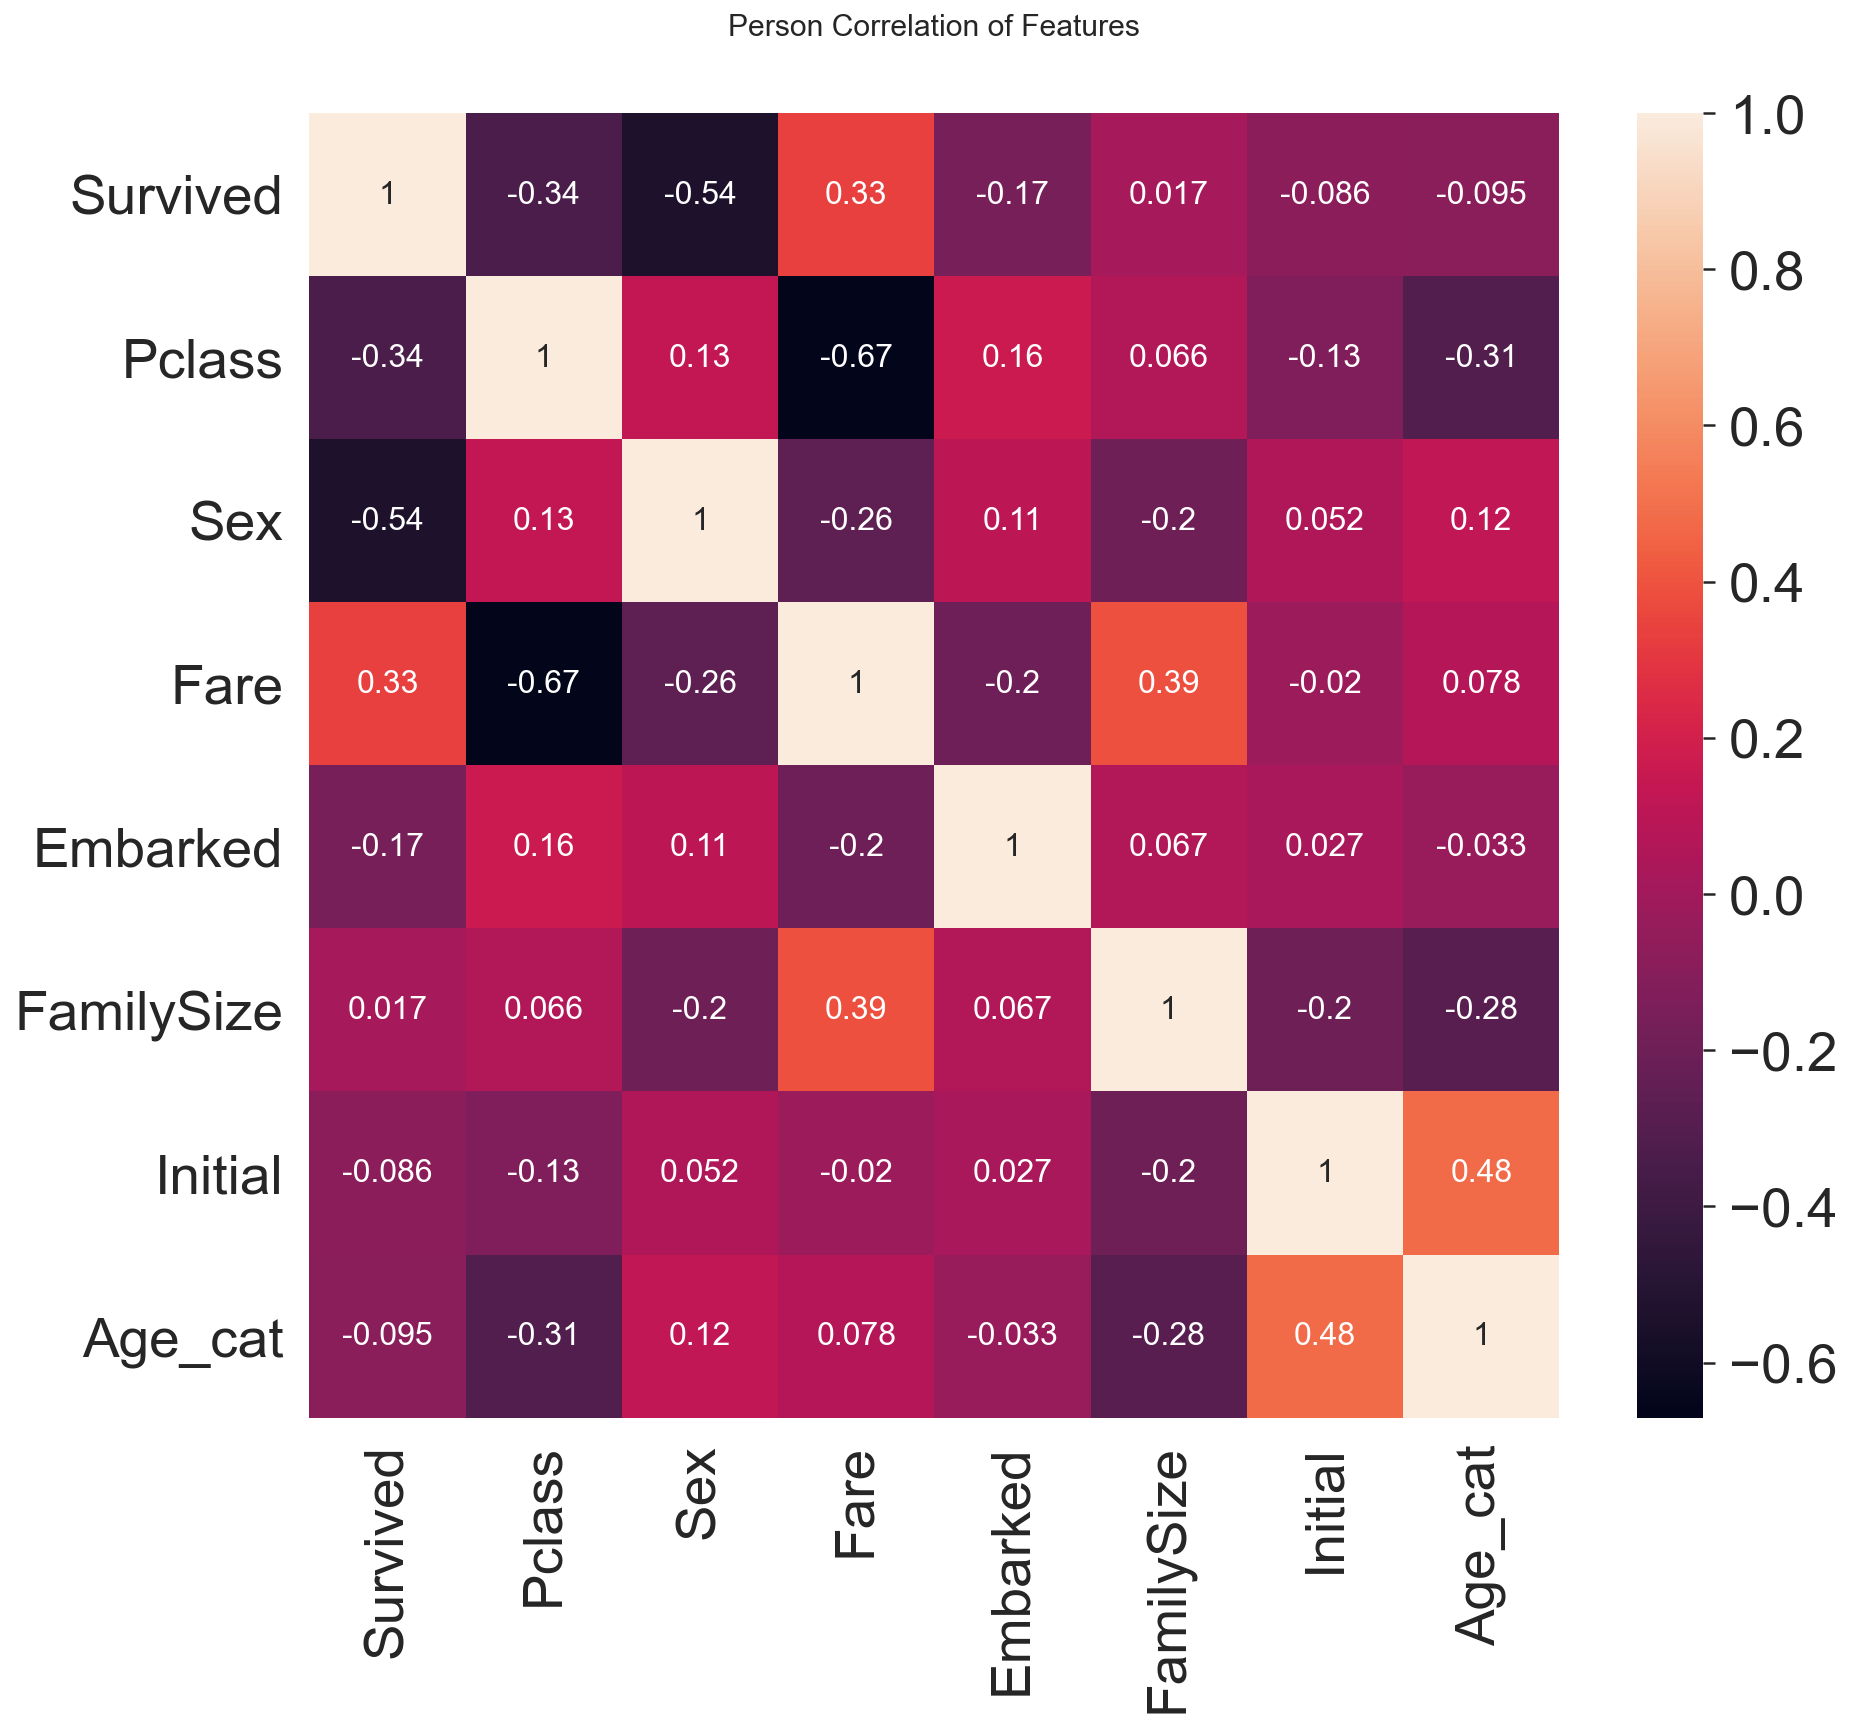

In [77]:
heatmap_data = df_train[["Survived", "Pclass", "Sex", "Fare", "Embarked", "FamilySize", "Initial", "Age_cat"]]

colormap = plt.cm.RdBu
plt.figure(figsize=(14, 12))
plt.title("Person Correlation of Features", y=1.05, size=15)
sns.heatmap(heatmap_data.astype(float).corr(), linecolor="white", annot=True, annot_kws={"size": 16})

del heatmap_data

In [78]:
df_train = pd.get_dummies(df_train, columns=['Initial'], prefix='Initial')
df_test = pd.get_dummies(df_test, columns=['Initial'], prefix='Initial')

In [79]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4
0,1,0,3,"Braund, Mr. Owen Harris",1,1,0,A/5 21171,1.981001,NaN,2,2.0,2,0,0,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,0,PC 17599,4.266662,C85,0,2.0,3,0,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",0,0,0,STON/O2. 3101282,2.070022,NaN,2,1.0,2,0,1,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,0,113803,3.972177,C123,2,2.0,3,0,0,0,1,0
4,5,0,3,"Allen, Mr. William Henry",1,0,0,373450,2.085672,NaN,2,1.0,3,0,0,1,0,0


In [80]:
df_train = pd.get_dummies(df_train, columns=['Embarked'], prefix='Embarked')
df_test = pd.get_dummies(df_test, columns=['Embarked'], prefix='Embarked')

In [81]:
## 3.5 Drop cloumns

In [82]:
df_train.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin'], axis=1, inplace=True)
df_test.drop(['PassengerId', 'Name',  'SibSp', 'Parch', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [83]:
df_train.head()

,Survived,Pclass,Sex,Fare,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0,Embarked_1,Embarked_2
0,0,3,1,1.981001,2.0,2,0,0,1,0,0,0,0,1
1,1,1,0,4.266662,2.0,3,0,0,0,1,0,1,0,0
2,1,3,0,2.070022,1.0,2,0,1,0,0,0,0,0,1
3,1,1,0,3.972177,2.0,3,0,0,0,1,0,0,0,1
4,0,3,1,2.085672,1.0,3,0,0,1,0,0,0,0,1


In [84]:
df_test.head()

,Pclass,Sex,Fare,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0,Embarked_1,Embarked_2
0,3,1,2.057860,1,2,0,0,1,0,0,0,1,0
1,3,0,1.945910,2,3,0,0,0,1,0,0,0,1
2,2,1,2.270836,1,2,0,0,1,0,0,0,1,0
3,3,1,2.159003,1,3,0,0,1,0,0,0,0,1
4,3,0,2.508582,3,3,0,0,0,1,0,0,0,1


In [85]:
# 4. Building machine learning model and prediction using the trained model

In [86]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [87]:
## 4.1 Preparation - Split dataset into train, valid, test set

In [88]:
X_train = df_train.drop("Survived", axis=1).values
target_label = df_train["Survived"].values
X_test = df_test.values

In [89]:
X_tr, X_vld, y_tr, y_vld = train_test_split(X_train, target_label, test_size=0.3, random_state=12)

In [90]:
model = RandomForestClassifier()
model.fit(X_tr, y_tr)
prediction = model.predict(X_vld)

In [91]:
print("총 {}명 중 {:.2f}% 정확도로 생존을 맞춤". format(y_vld.shape[0], 100 * metrics.accuracy_score(prediction, y_vld)))

총 268명 중 76.49% 정확도로 생존을 맞춤


In [92]:
## 4.3 Feature importance

In [93]:
from pandas import Series

feature_importance = model.feature_importances_
Series_feat_imp = Series(feature_importance, index=df_test.columns)

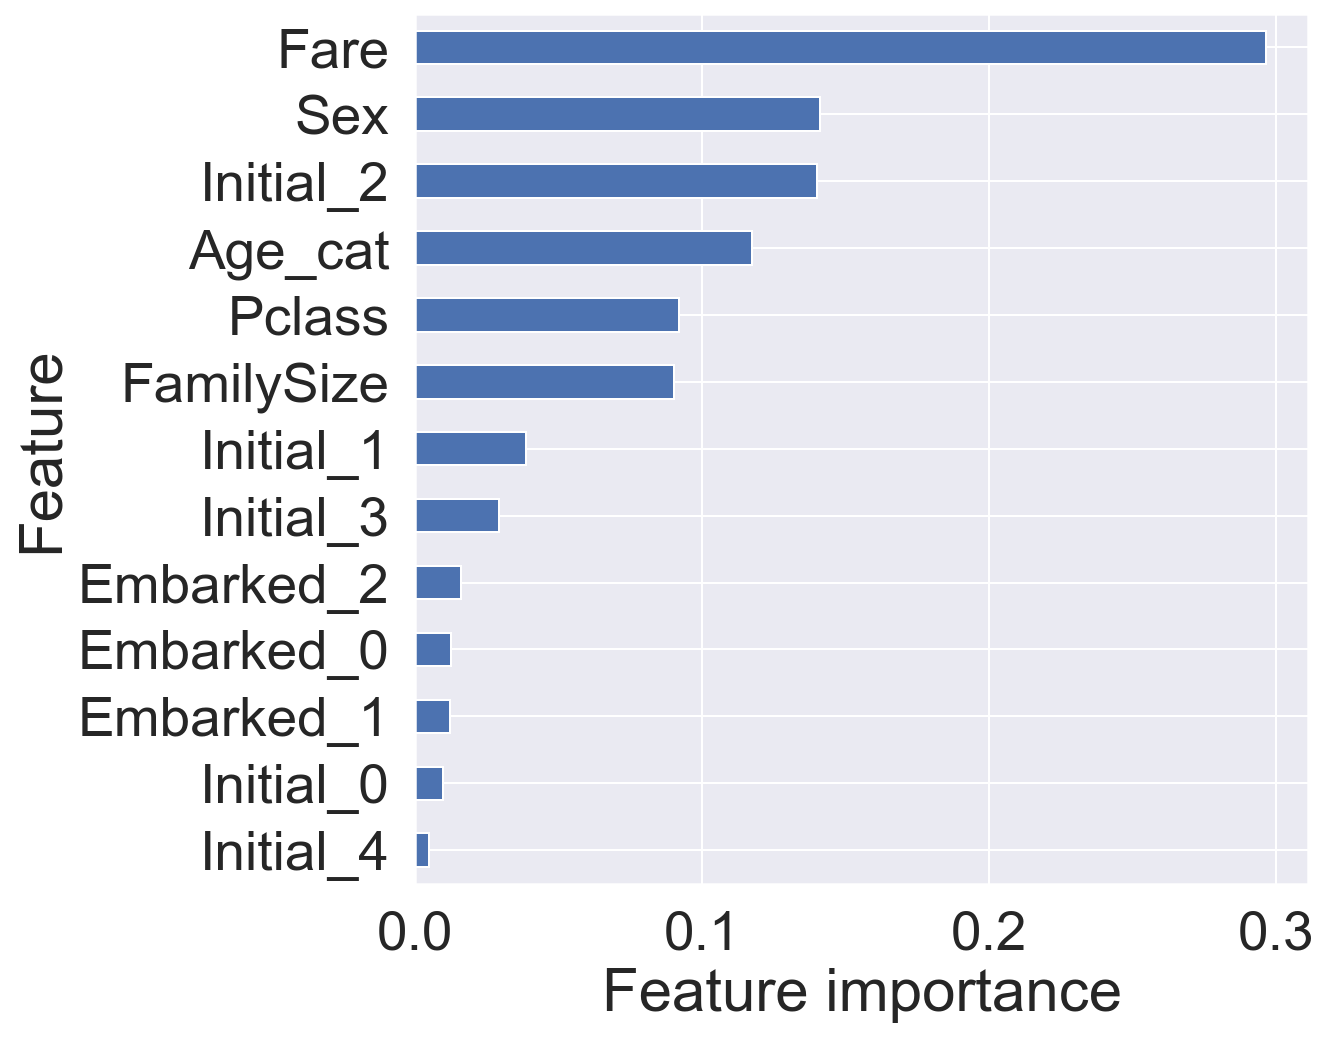

In [94]:
plt.figure(figsize=(8, 8))
Series_feat_imp.sort_values(ascending=True).plot.barh()
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

In [96]:
# Fare가 가장 큰 영향력을 가지며, 그 뒤로 Initial_2, Age_cat, Pclass가 차례로 중요도를 가진다.
# RandomForest가 아닌 다른 모델을 사용한다면 다른 feature 결과 값이 나올 수 있습니다.
